In [40]:
import os
import fnmatch
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lombscargle

data_path = "../../../ogle_xrom"

In [47]:
# Photometry data files contain 5 columns: Hel.JD, I magnitude, magnitude error, seeing estimation (in pixels - 0.26"/pixel) and sky level

sources={}

data_path = "../../../ogle_xrom"


for root, dirnames, filenames in os.walk(data_path+"/ogle4"):
    for filename in fnmatch.filter(filenames, "phot.dat"):
        source_name = root.split("/")[-1]
        lc_path_4 = os.path.join(root, filename)
        lc_path_3 = os.path.join(root.replace("ogle4", "ogle3"), filename)
        try:
            ogle3 = np.loadtxt(lc_path_3)
            ogle4 = np.loadtxt(lc_path_4)
            data = np.vstack((ogle3, ogle4))
            sources[root.split("/")[-1]] = len(data)
            np.savetxt(data_path+"/ogle_merge/{}.csv".format(source_name), data, delimiter=",")
        except:
            pass

In [35]:
filenames

['lcurve_s.ps',
 'lcurve.gif',
 'fchart.fts',
 'lcurve_s.gif',
 'lcurve.ps',
 'phot.dat',
 'fchart.jpg',
 'fchart.ps']

In [46]:
data[-1,0]-data[0,0]

6429.631750000175

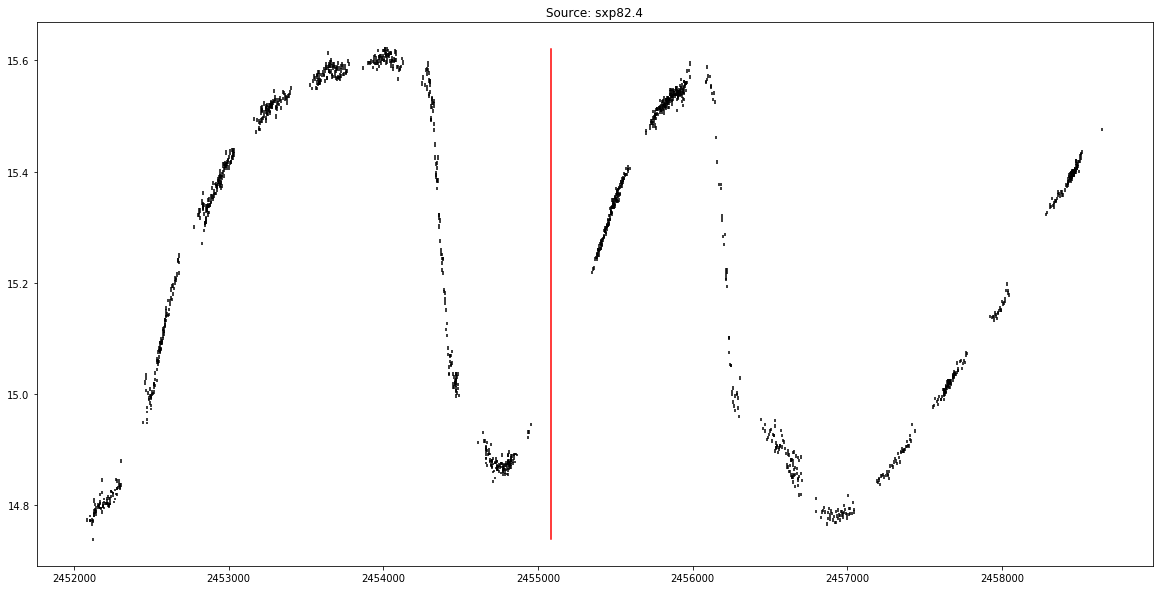

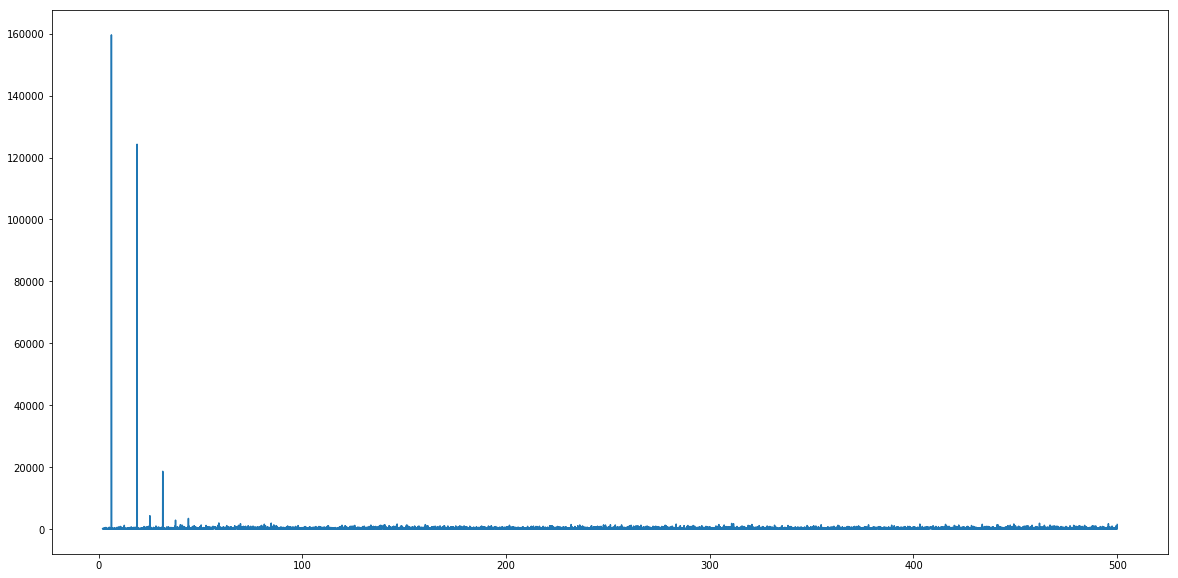

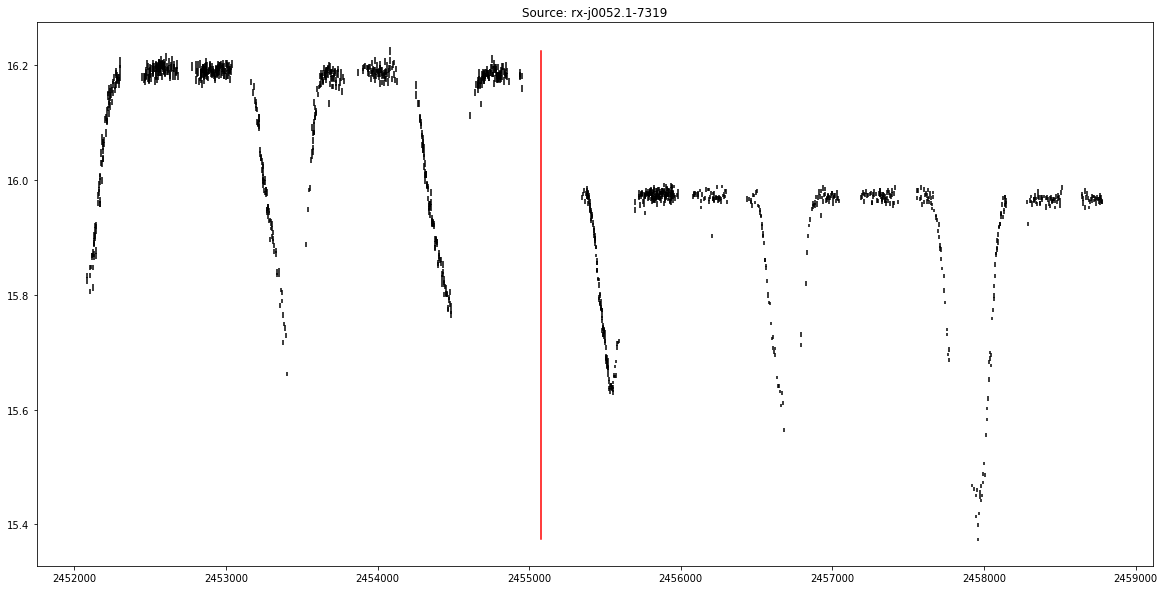

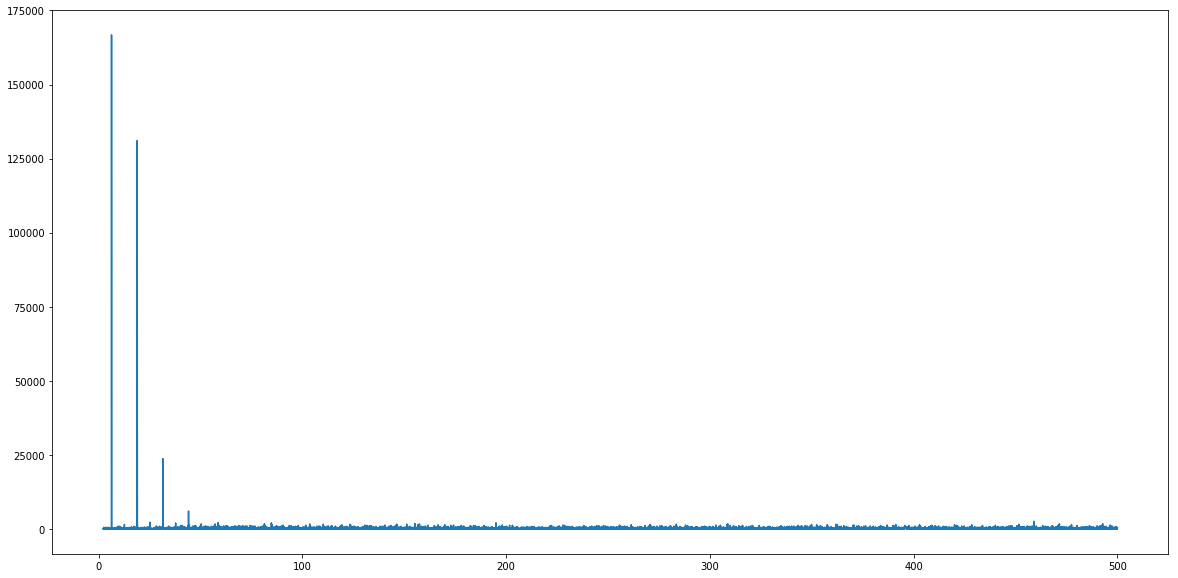

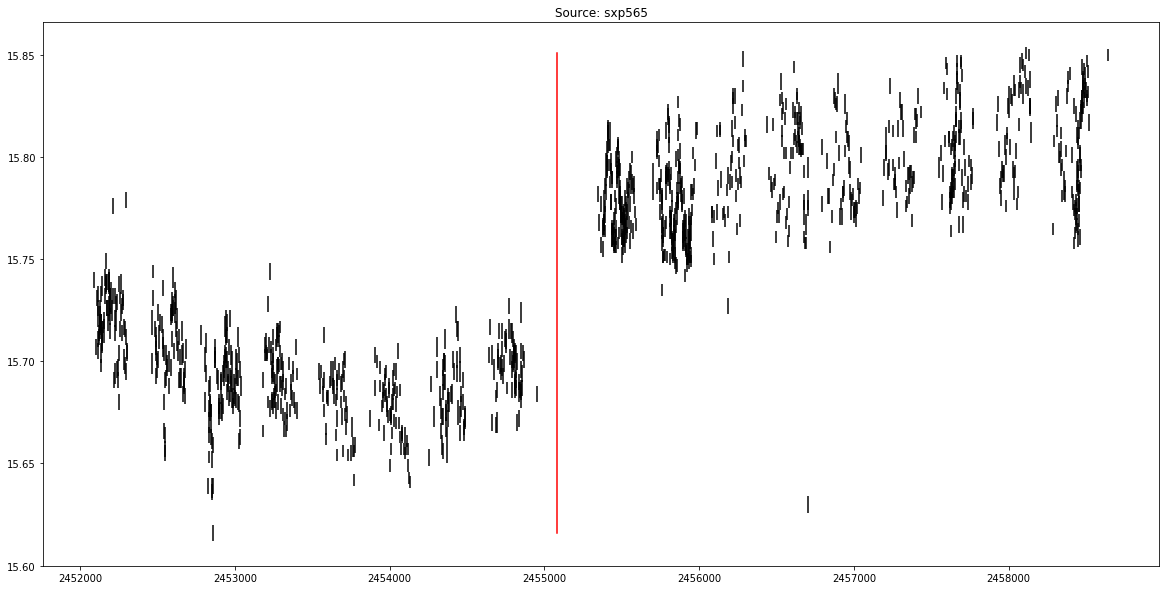

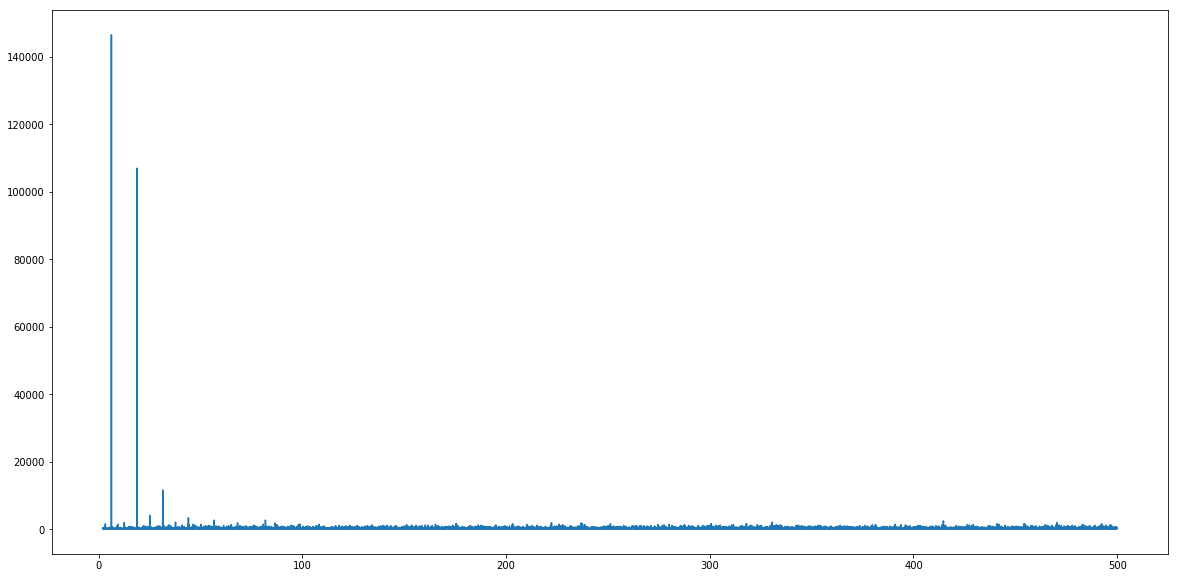

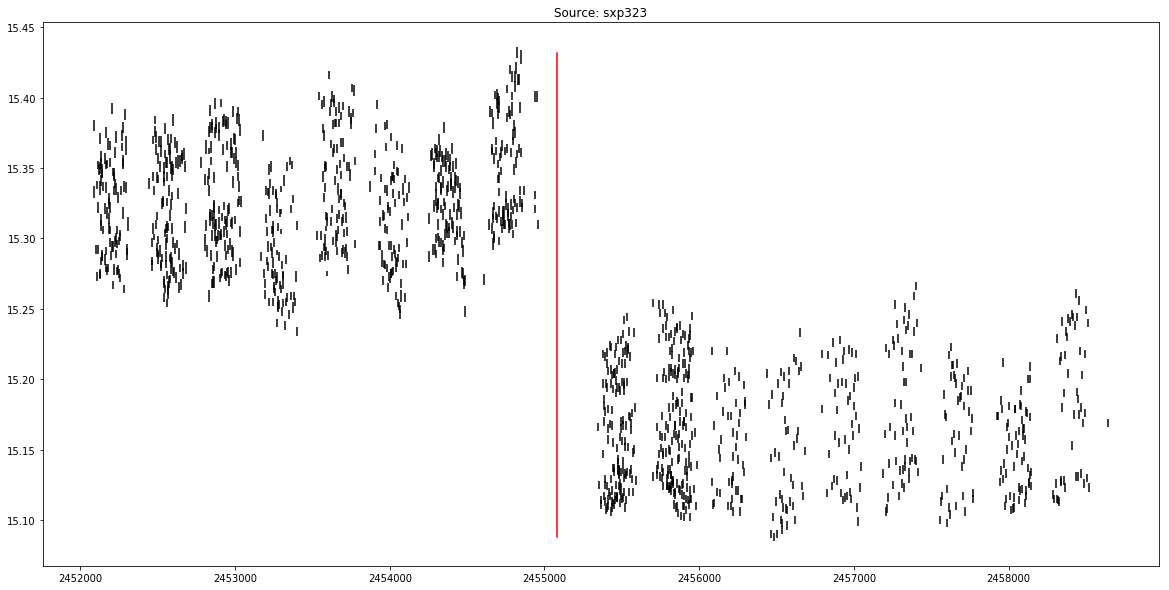

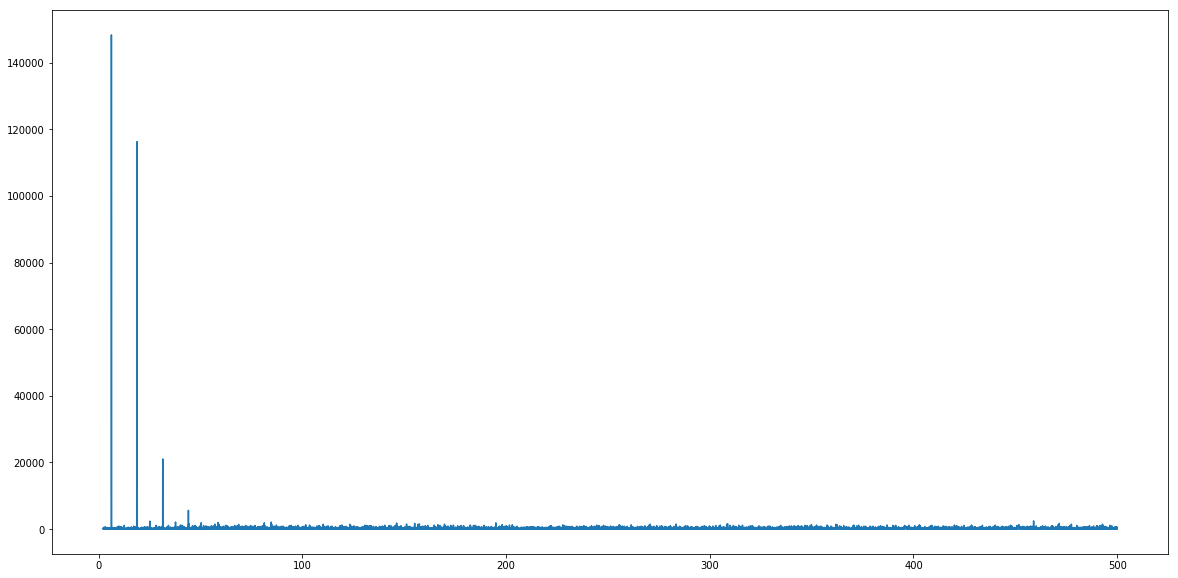

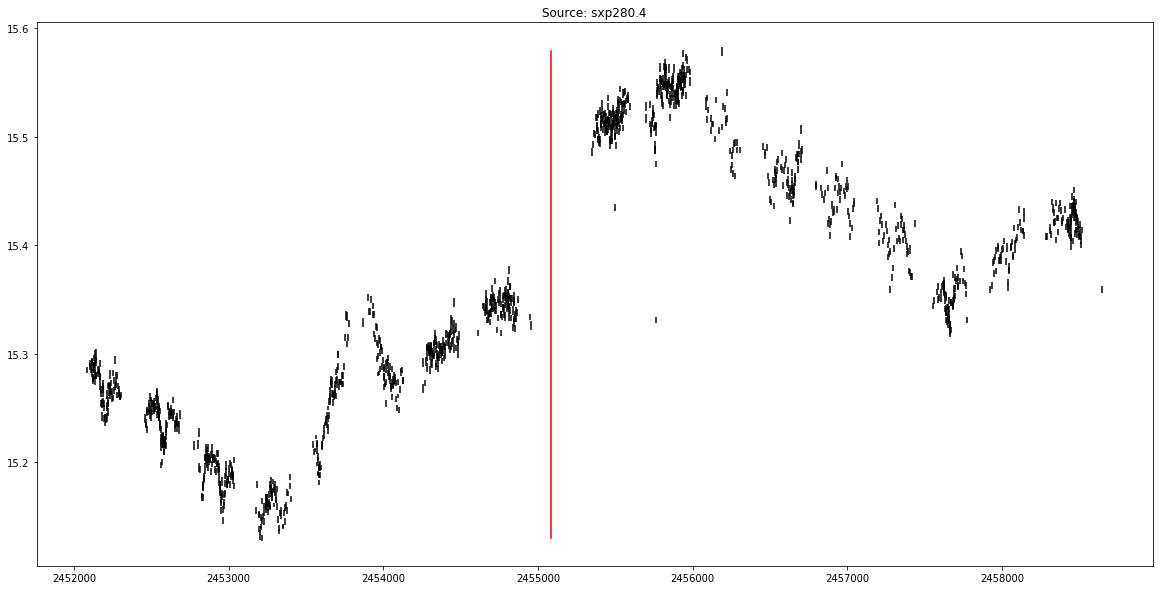

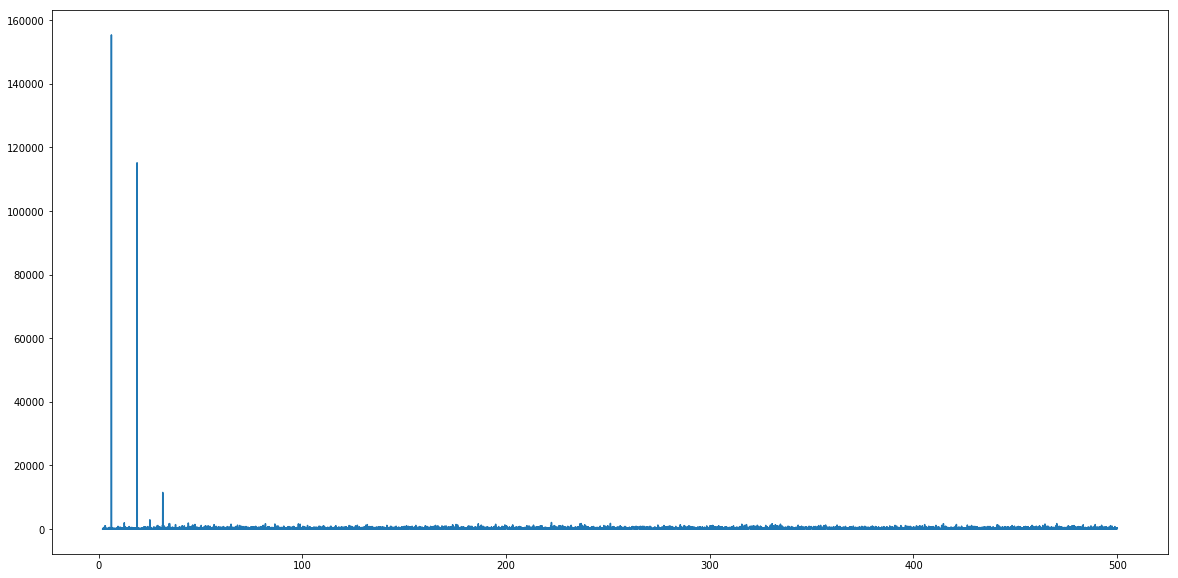

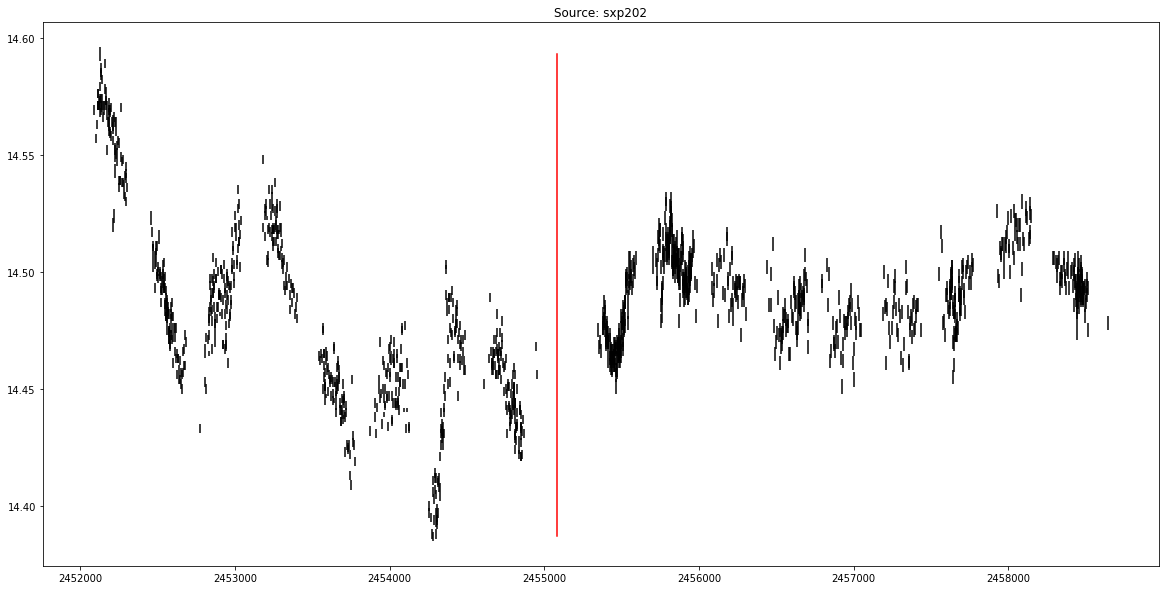

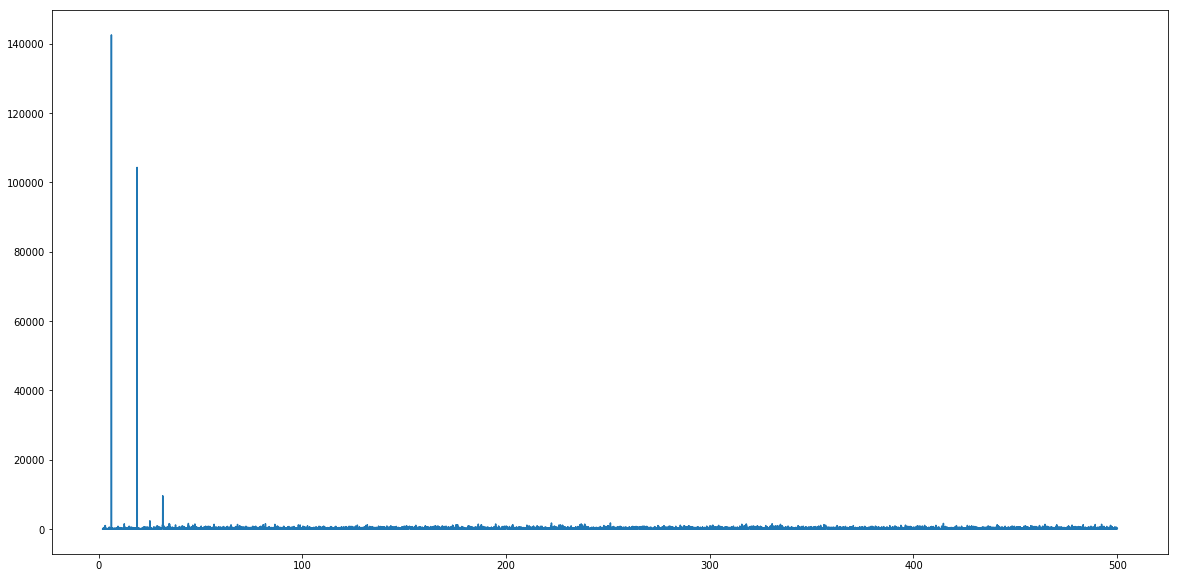

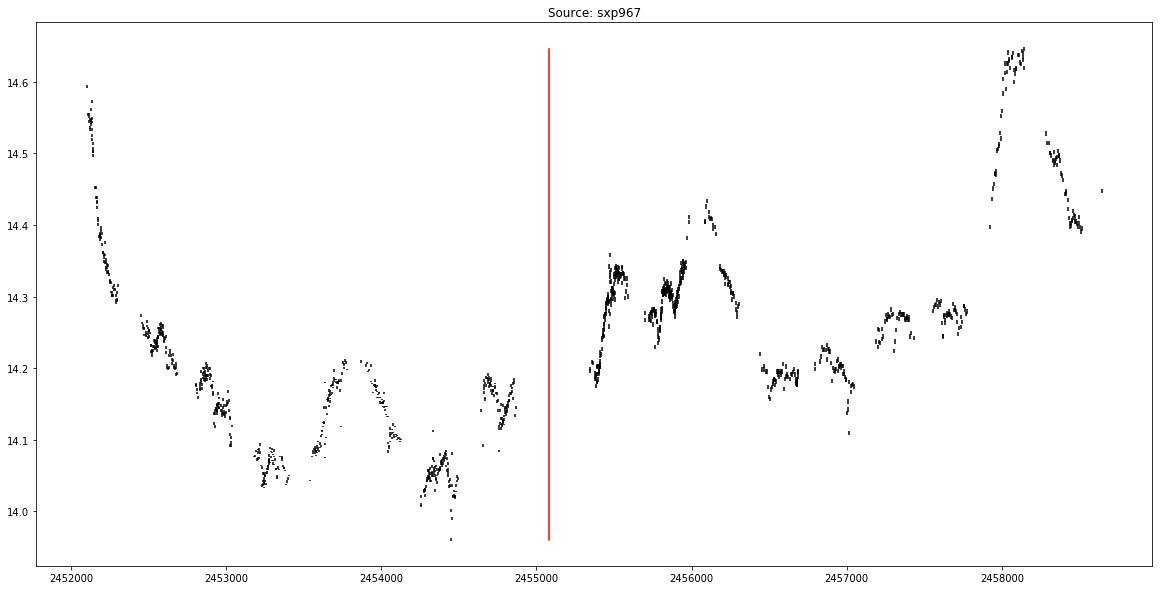

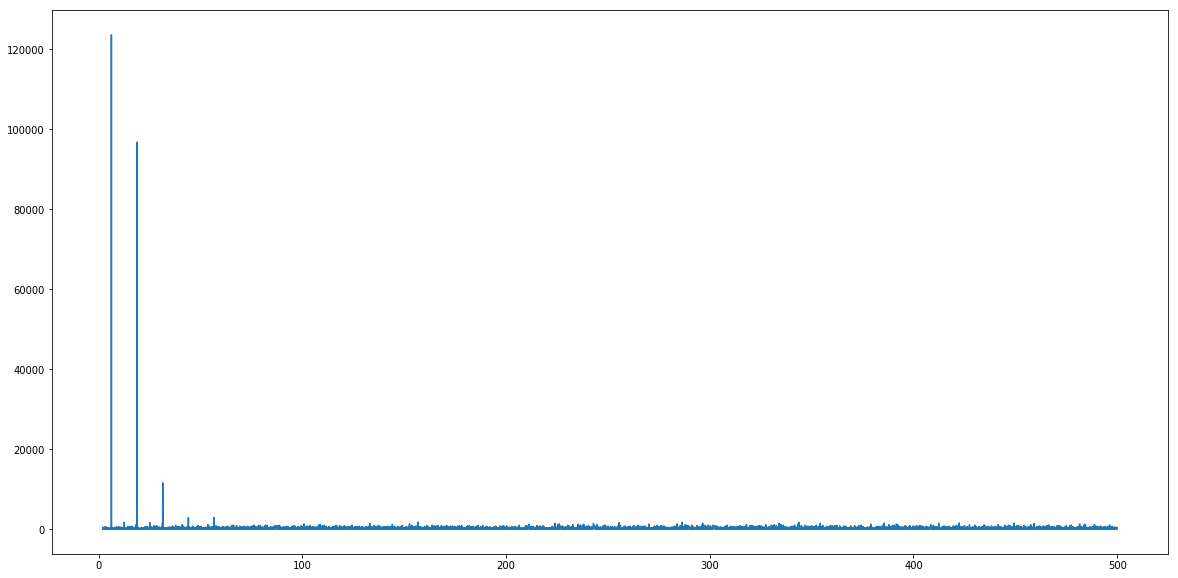

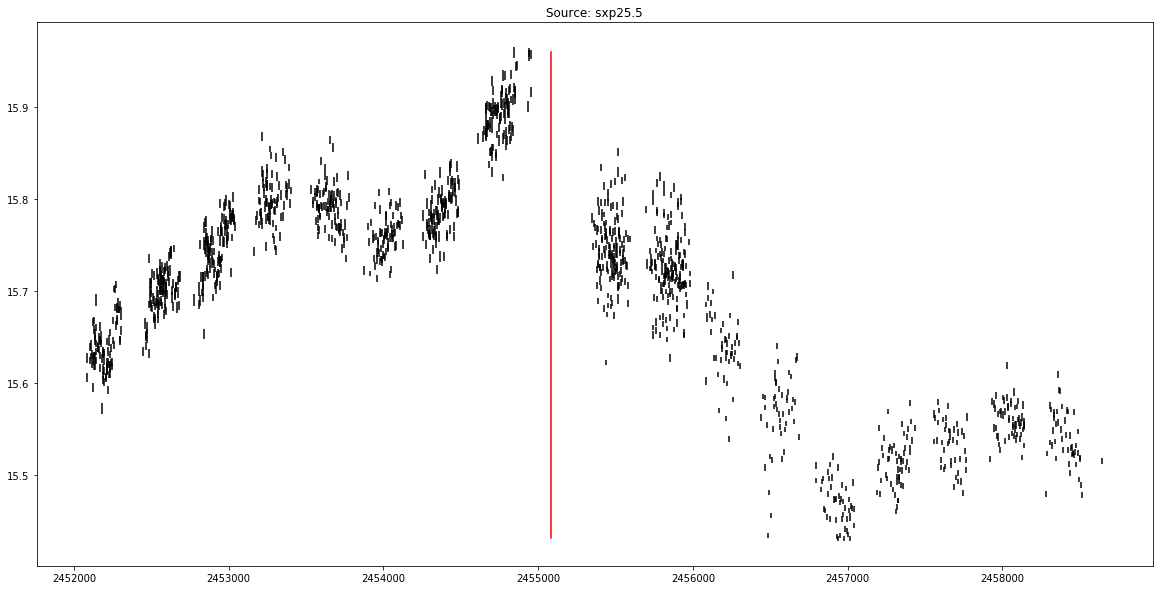

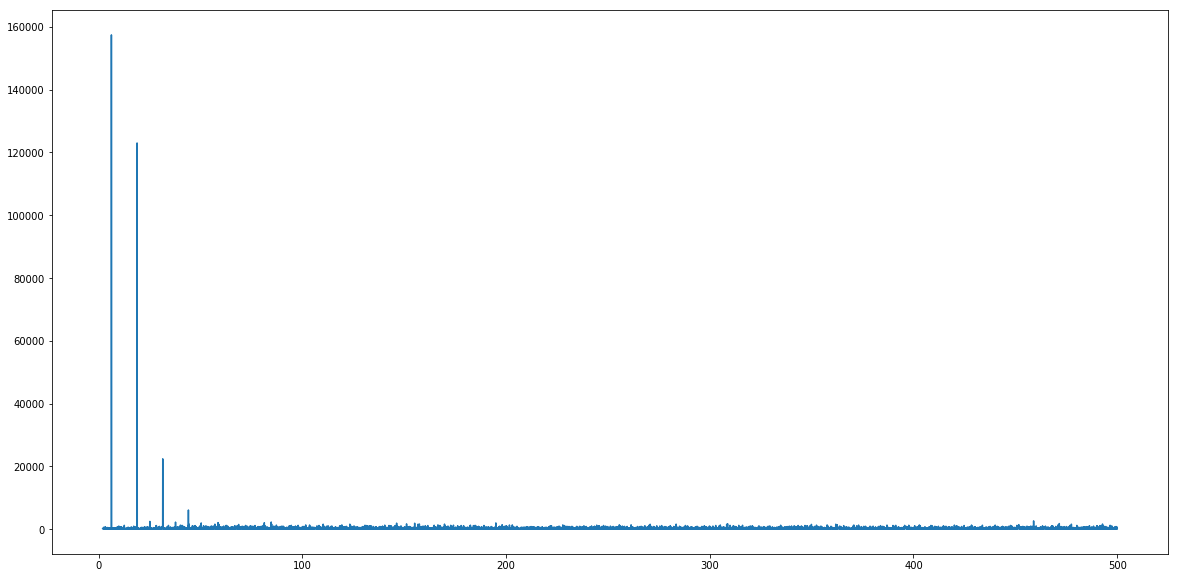

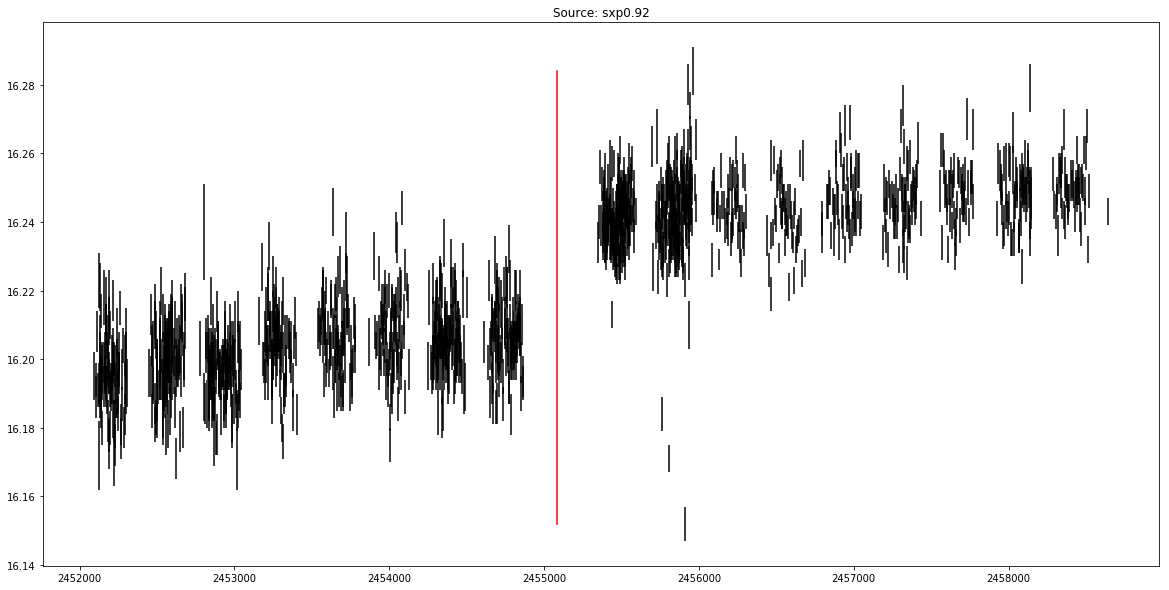

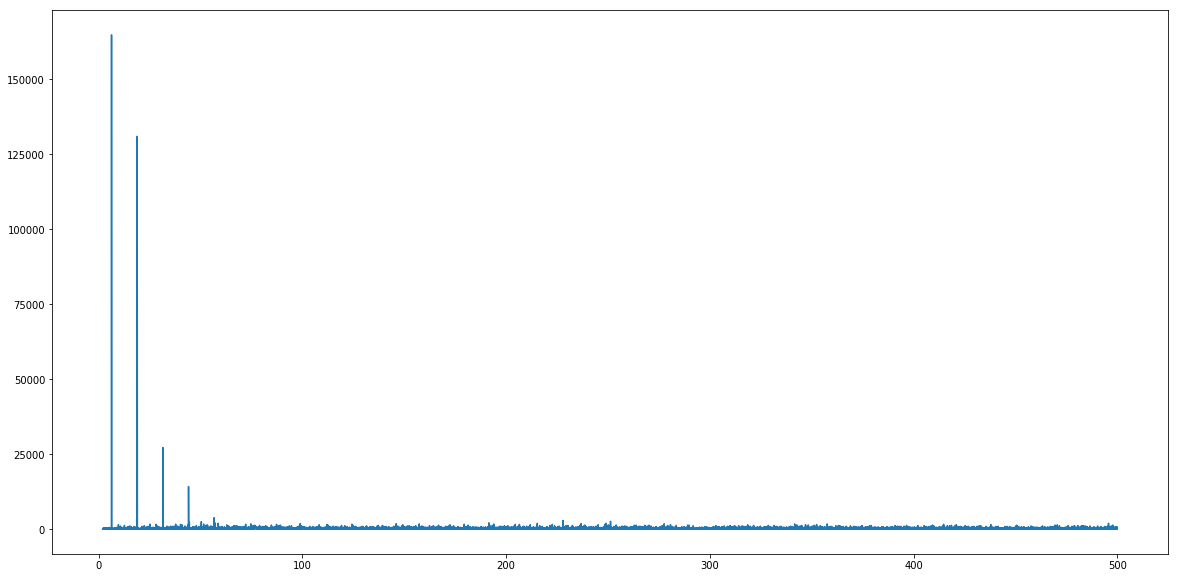

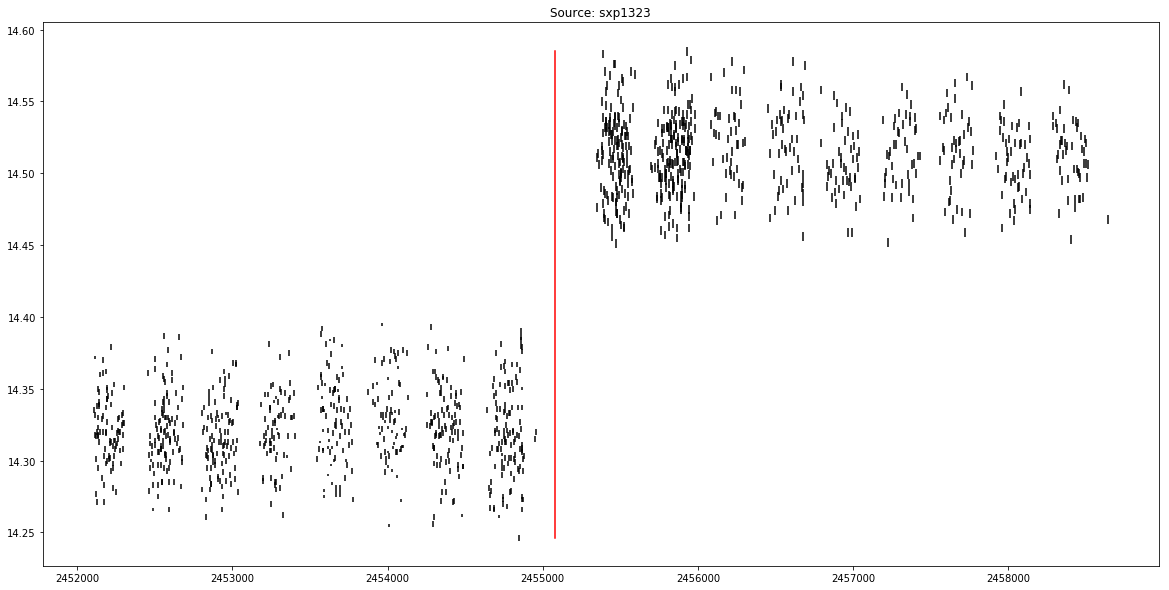

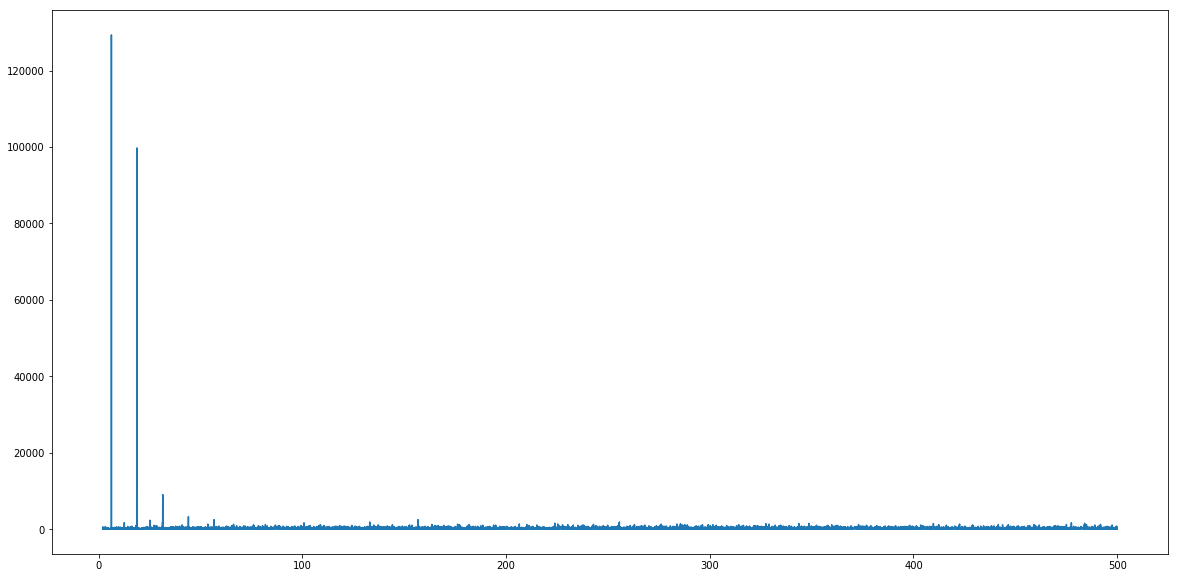

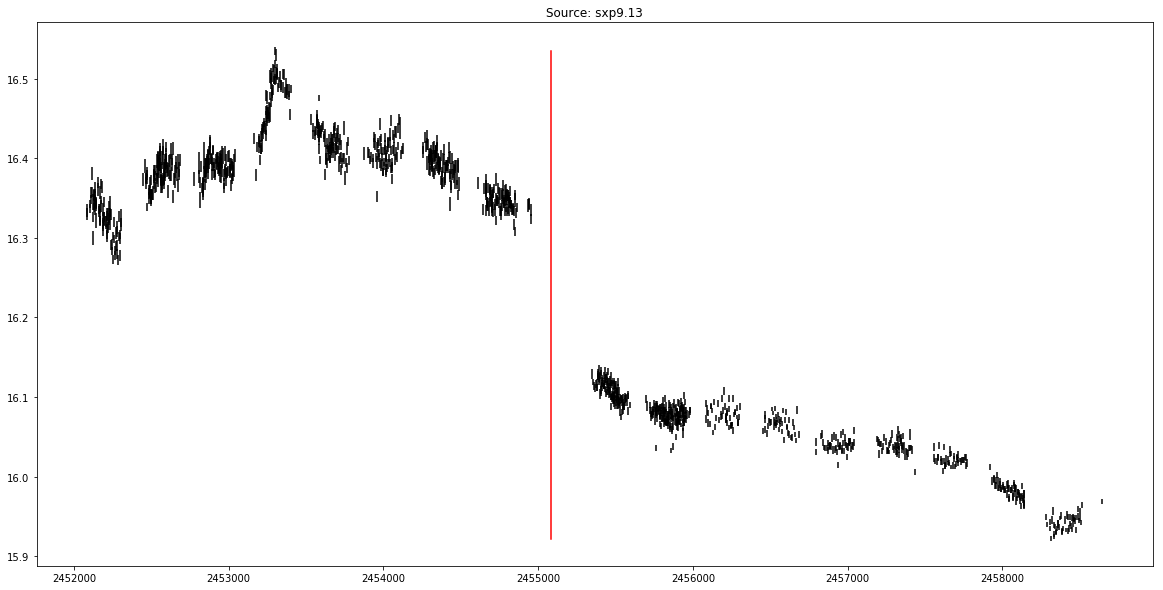

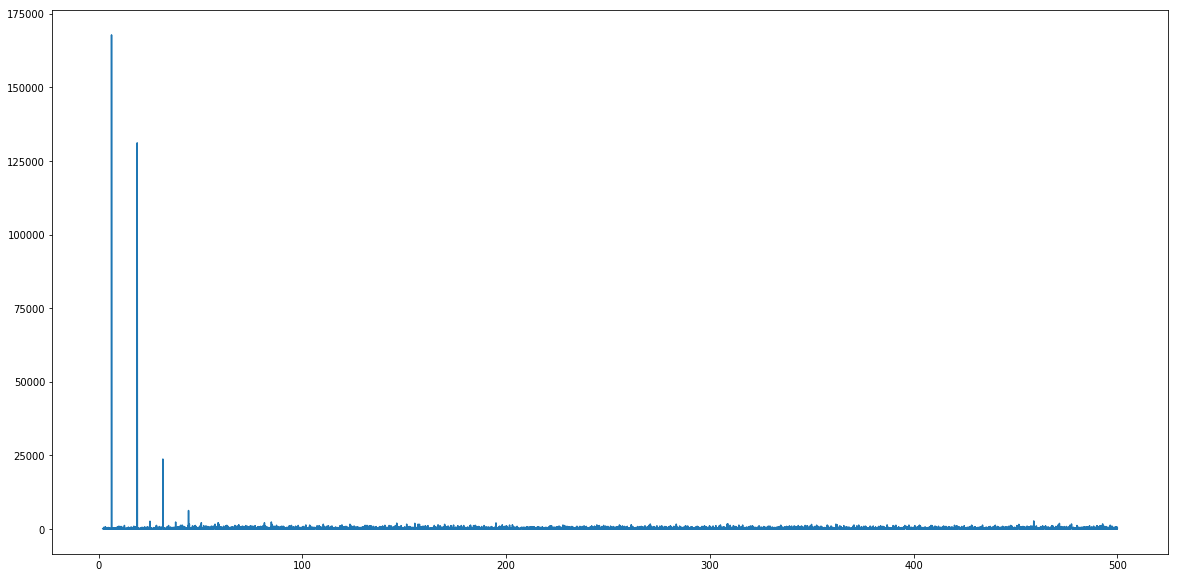

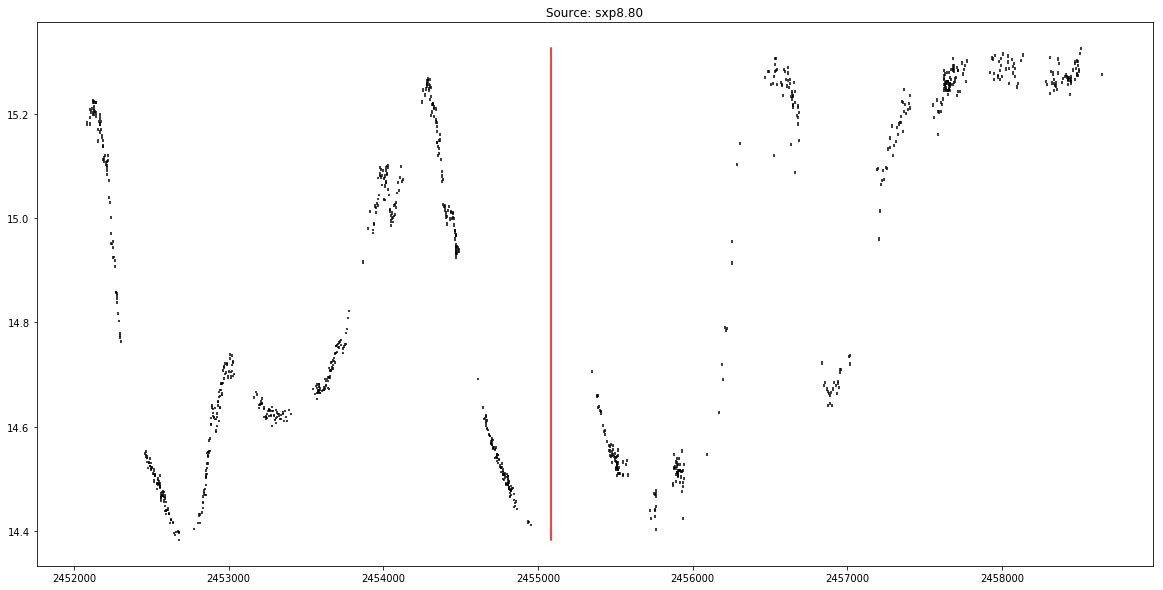

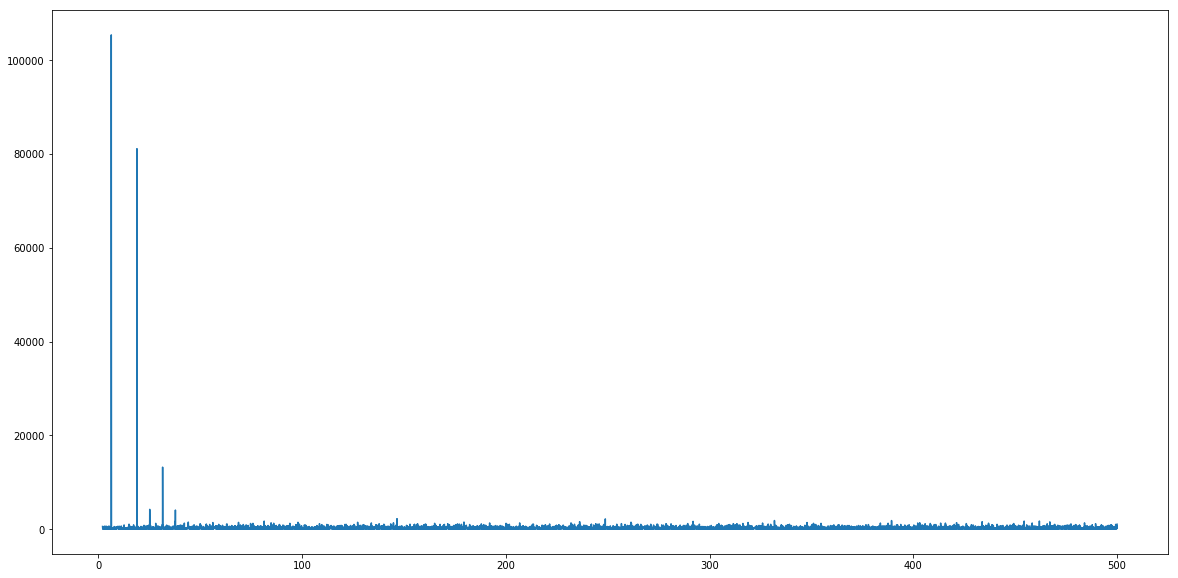

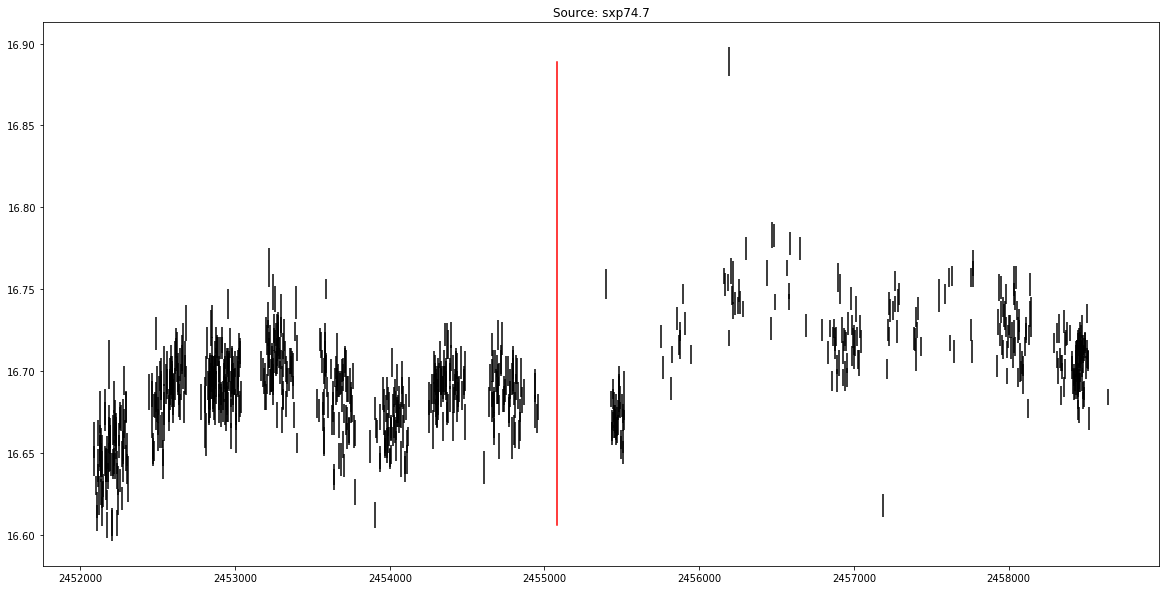

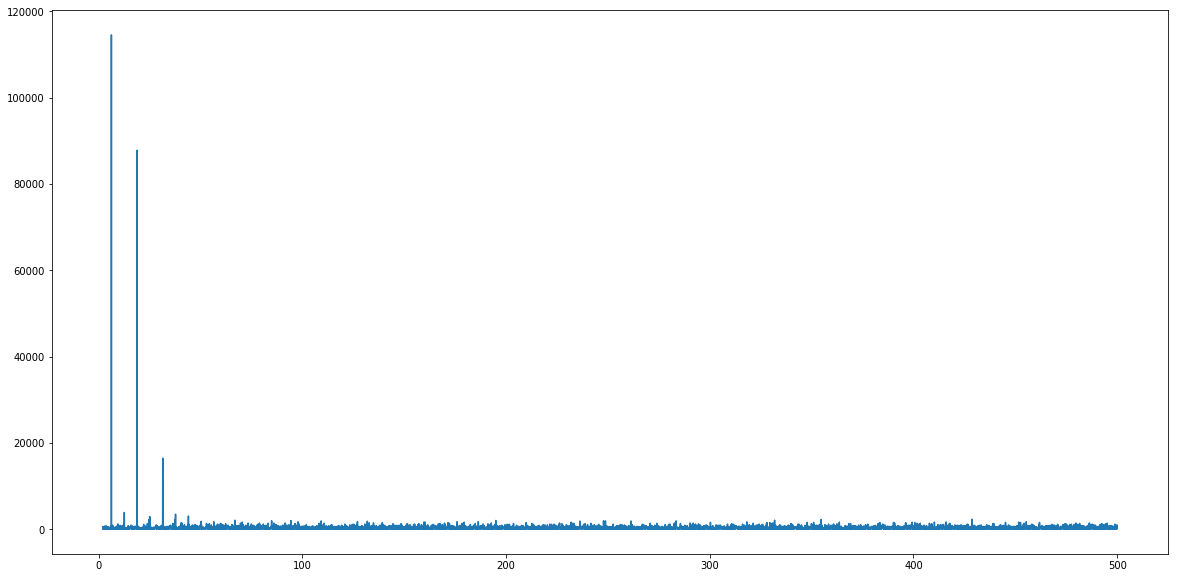

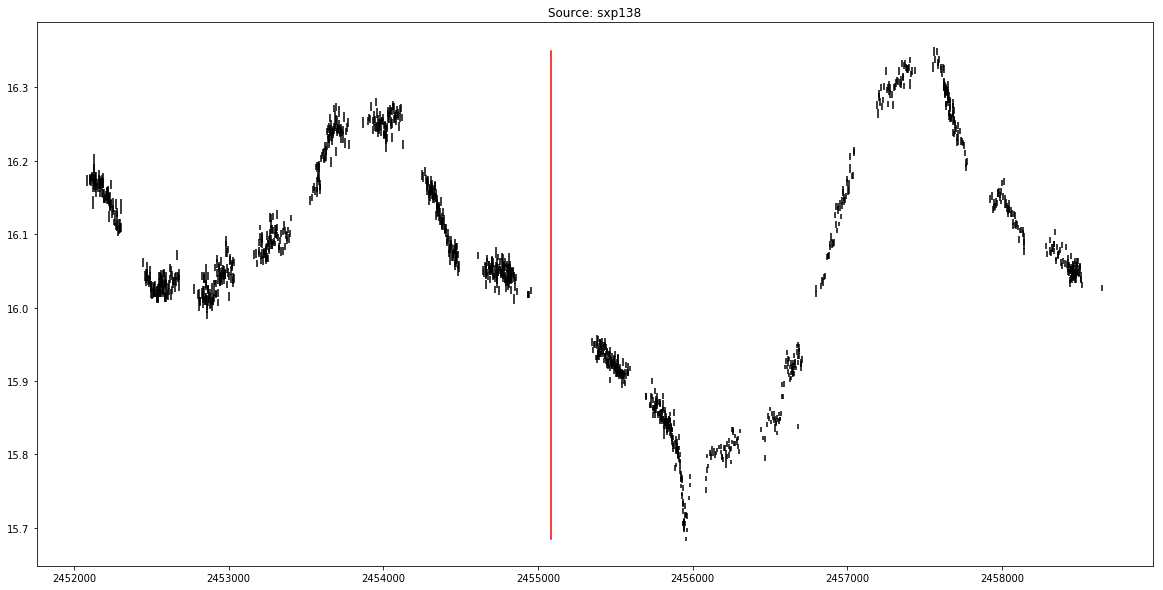

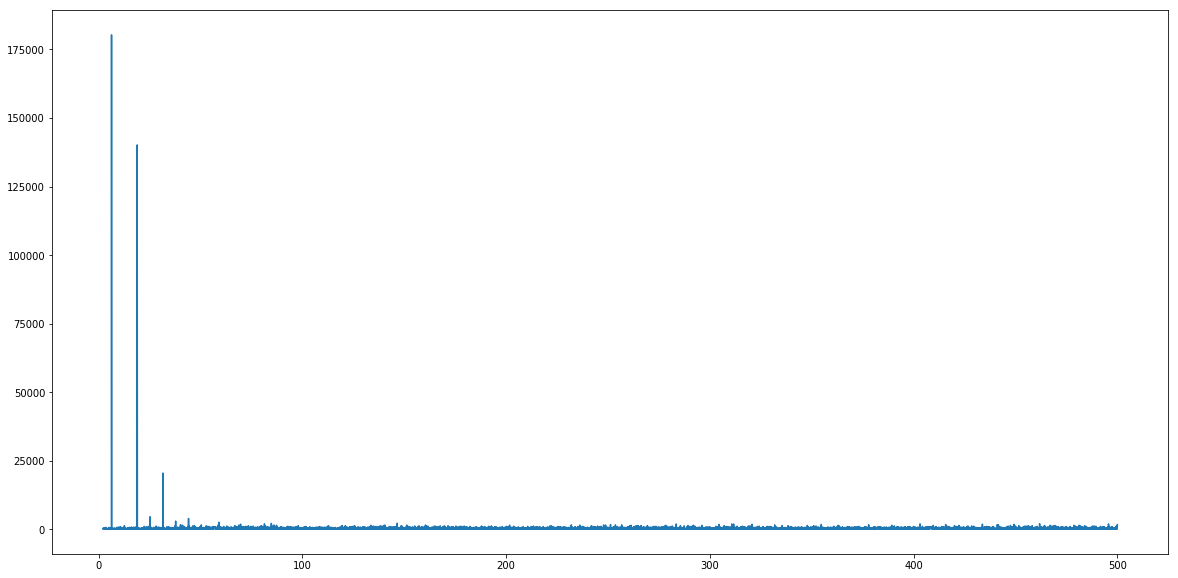

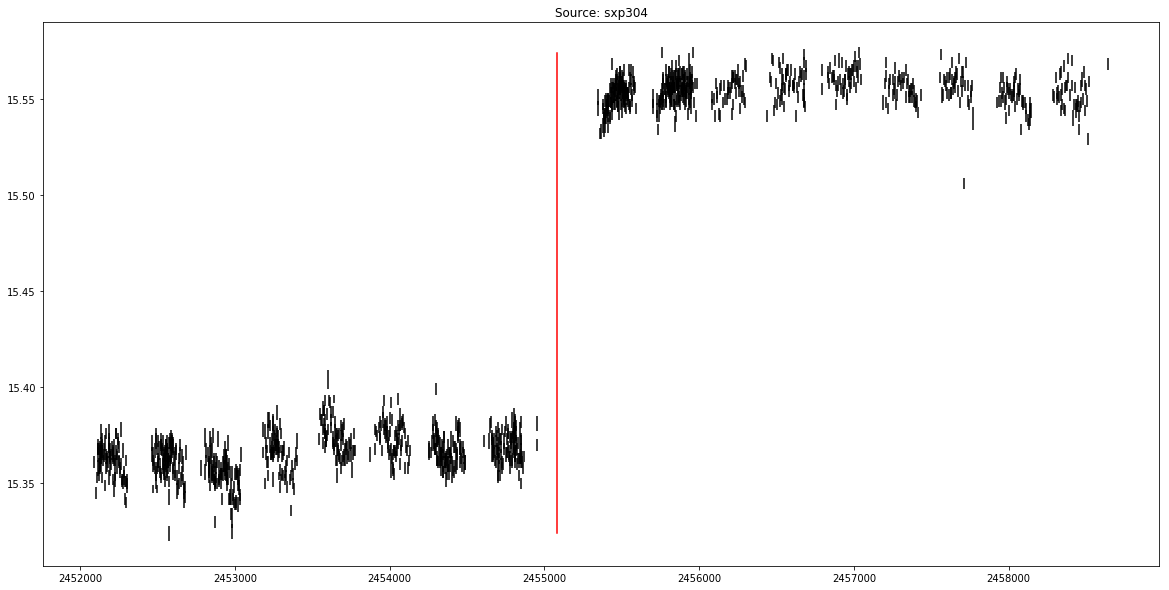

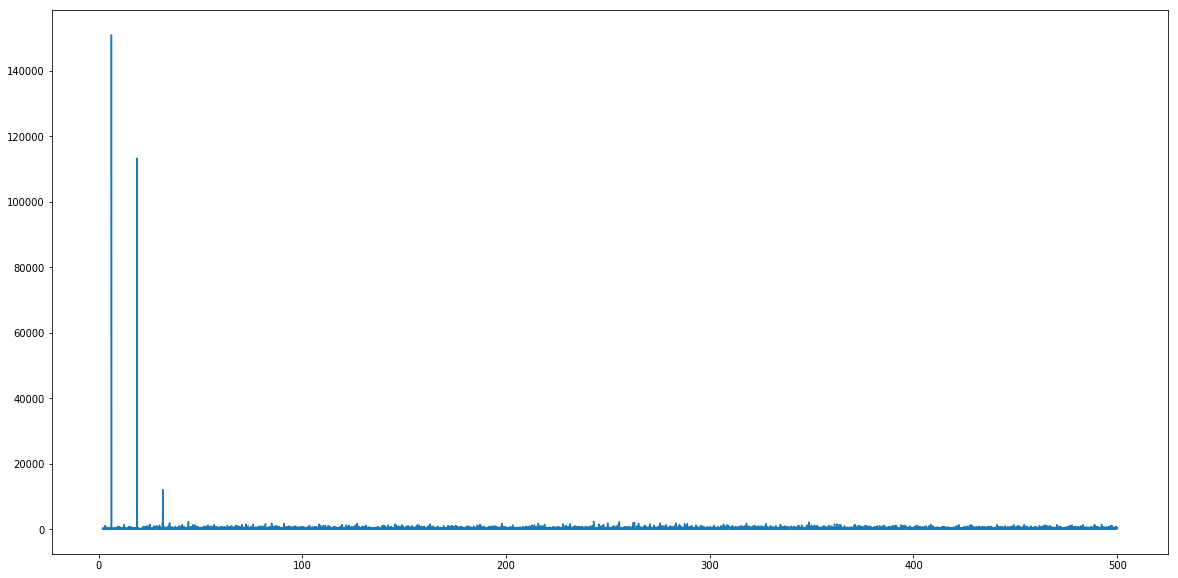

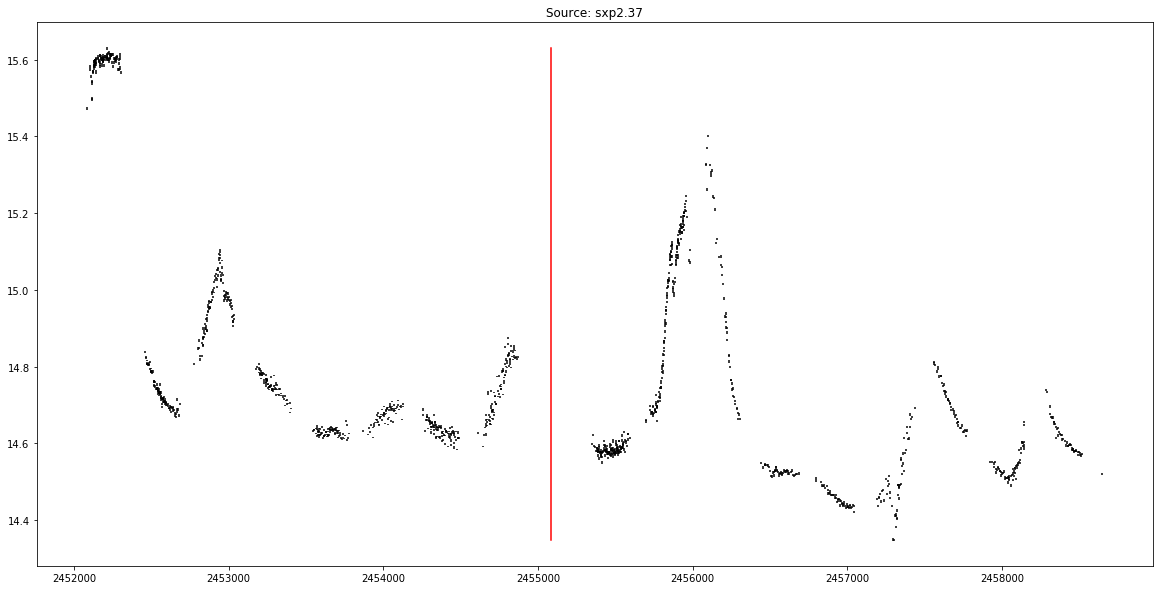

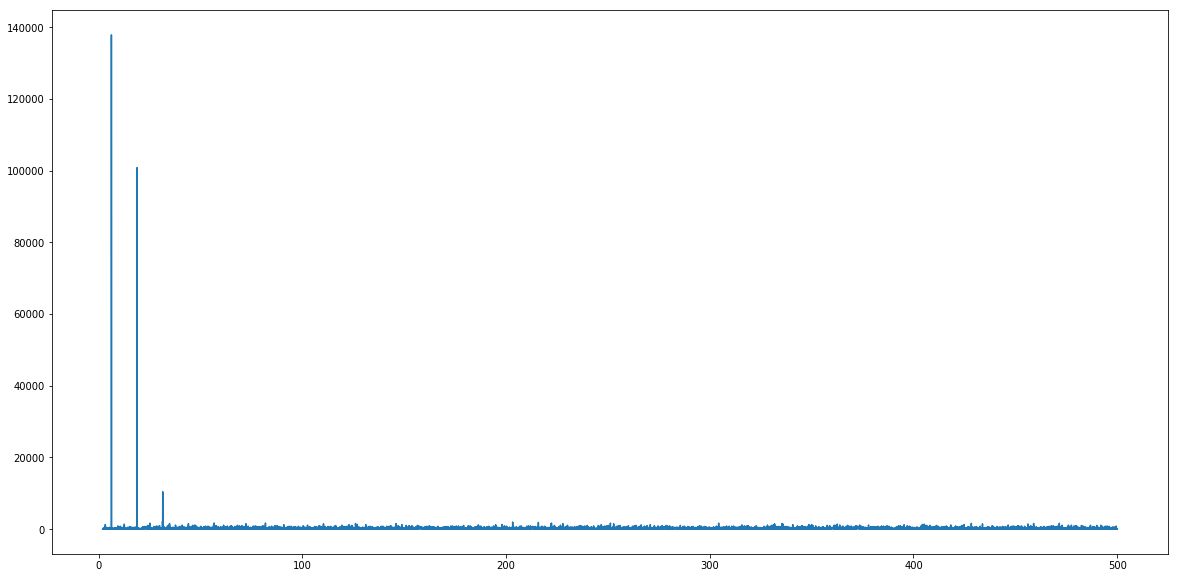

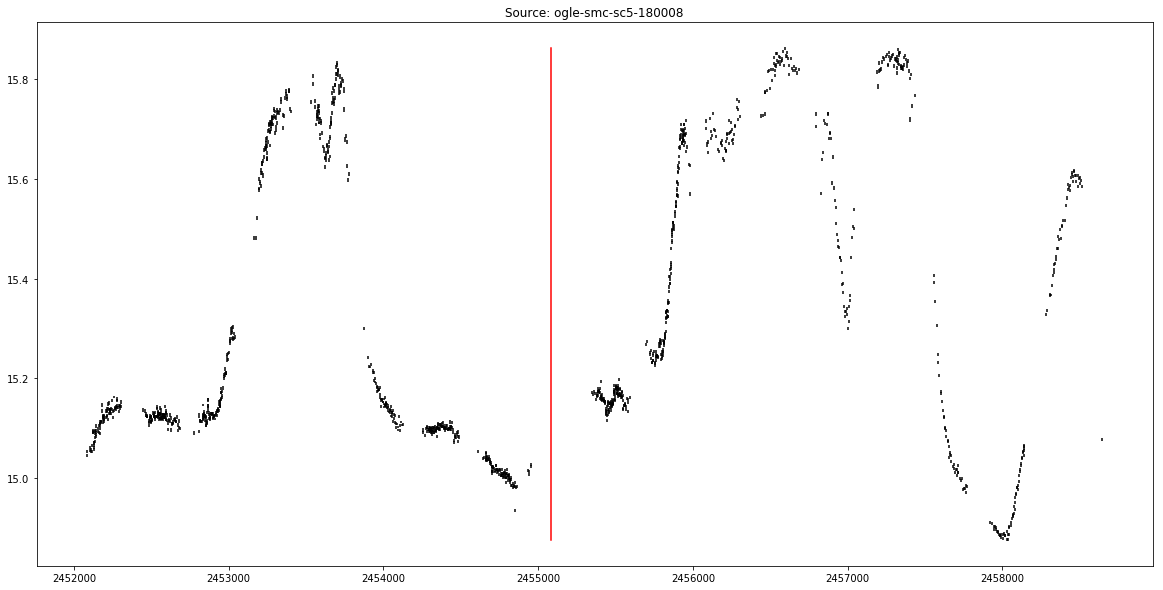

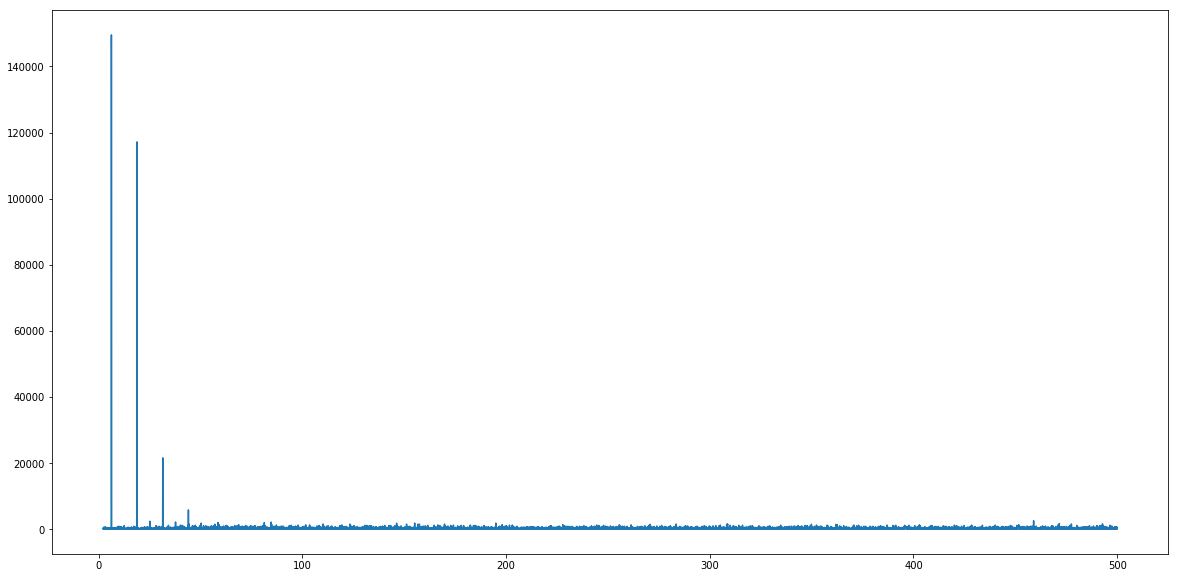

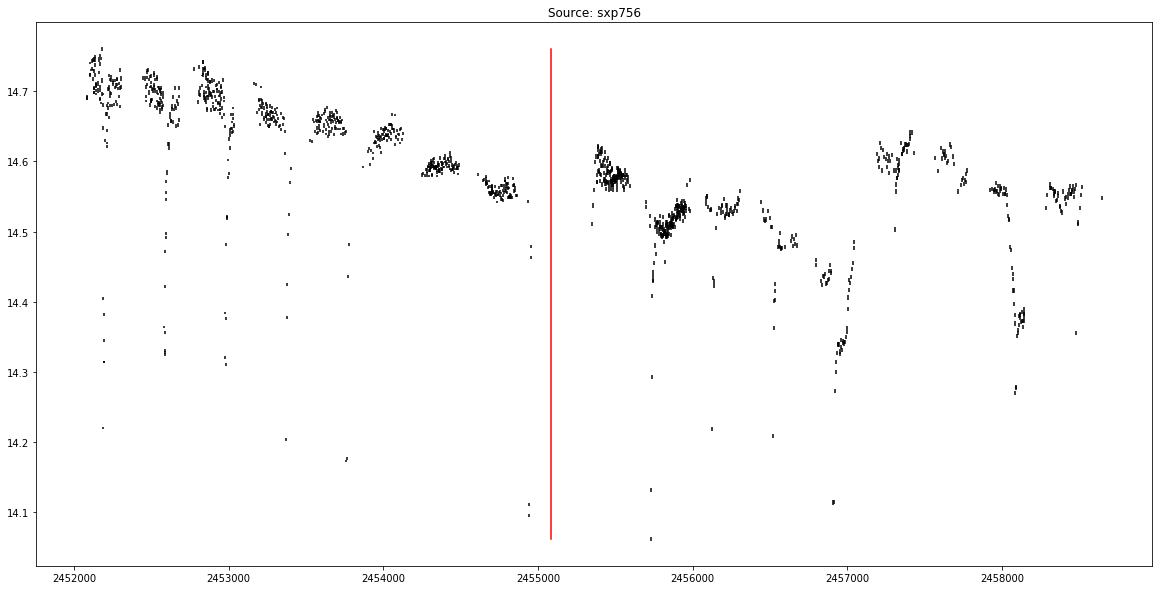

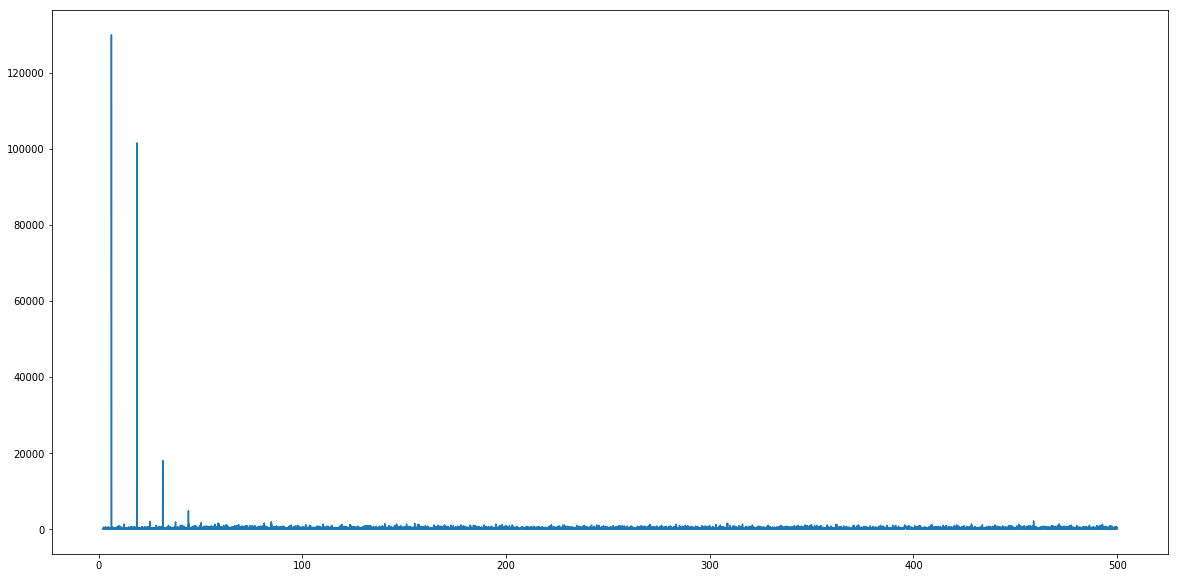

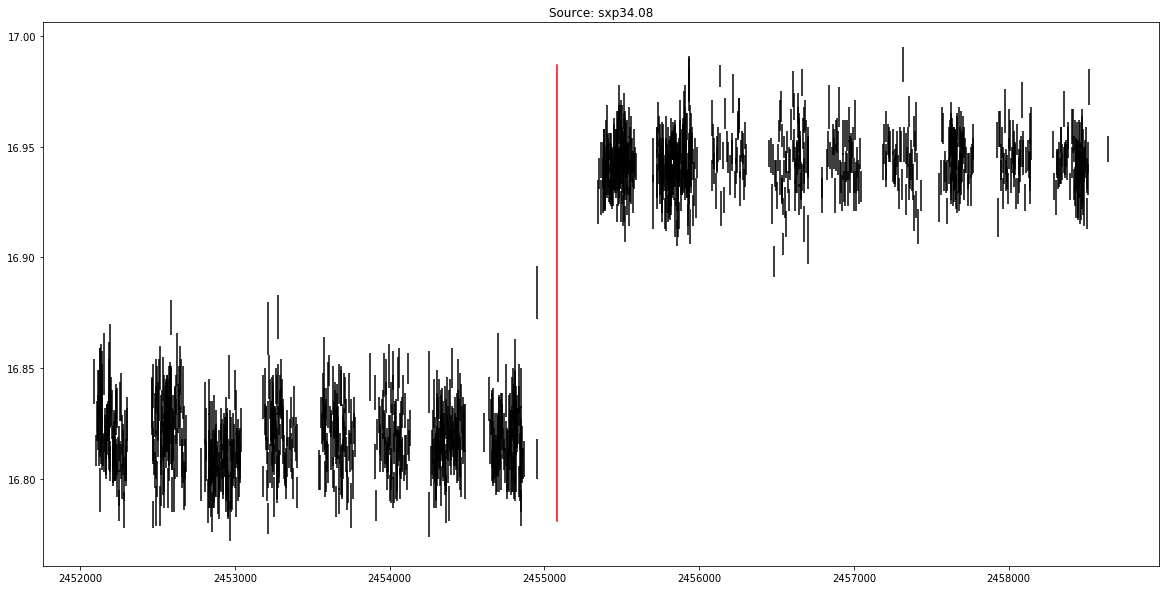

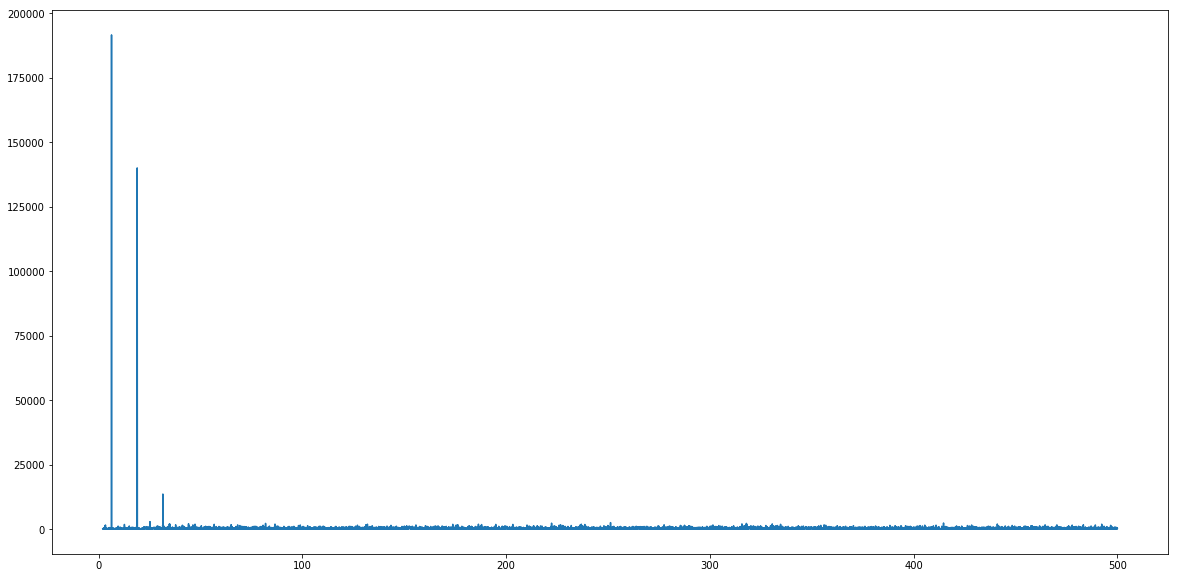

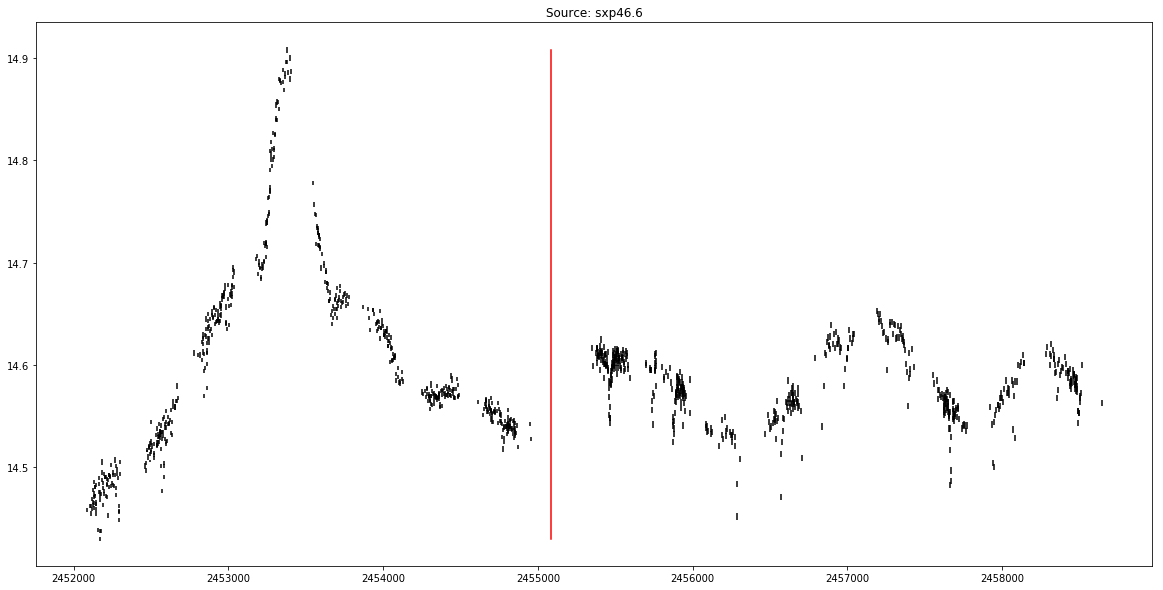

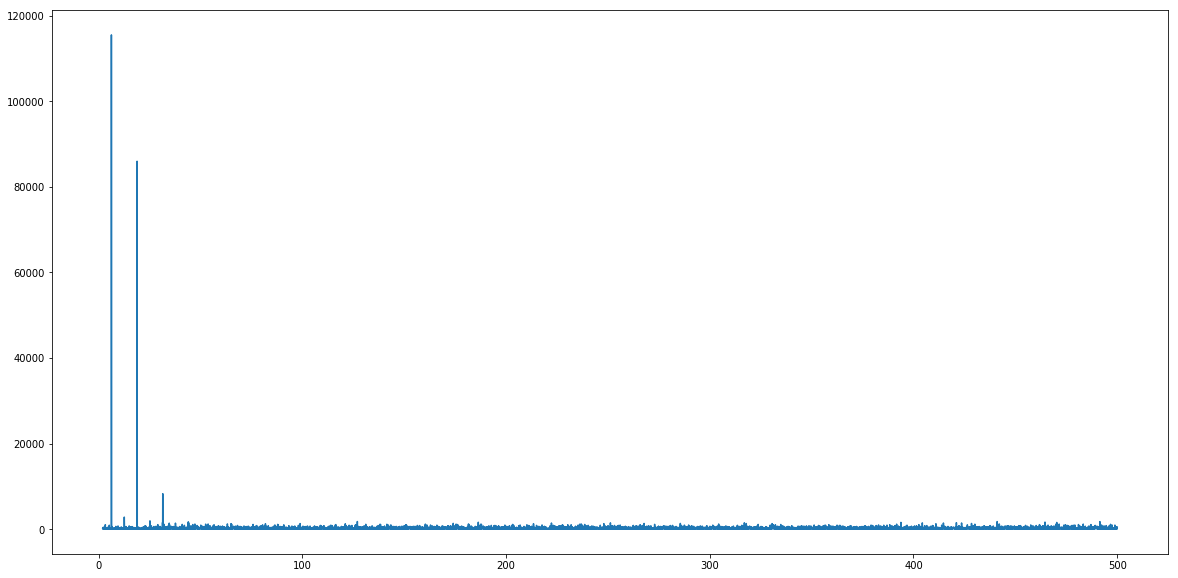

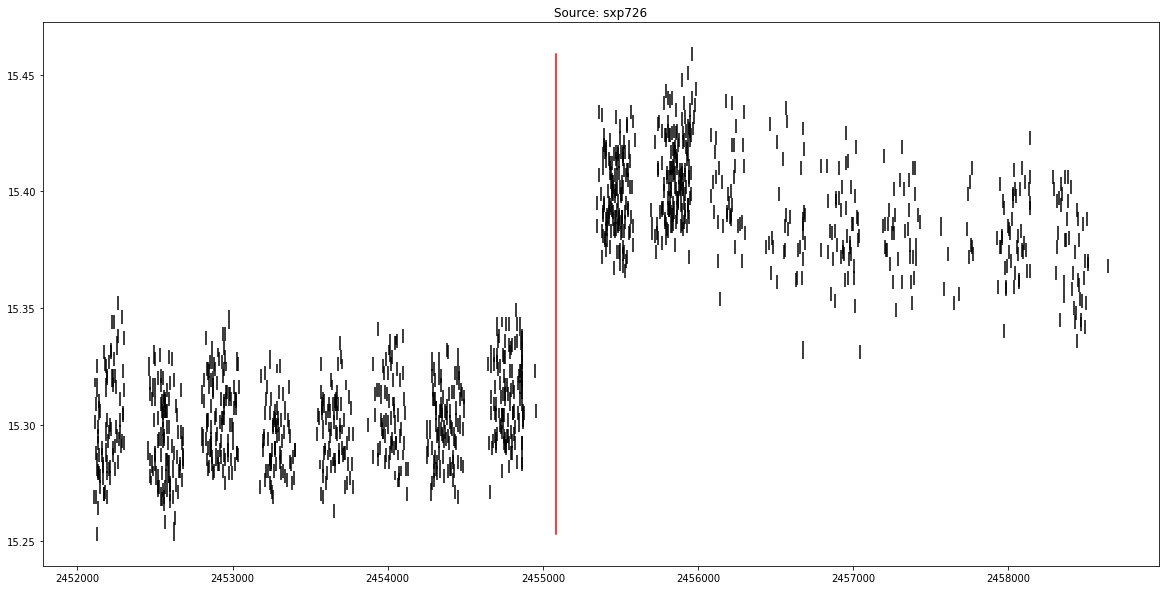

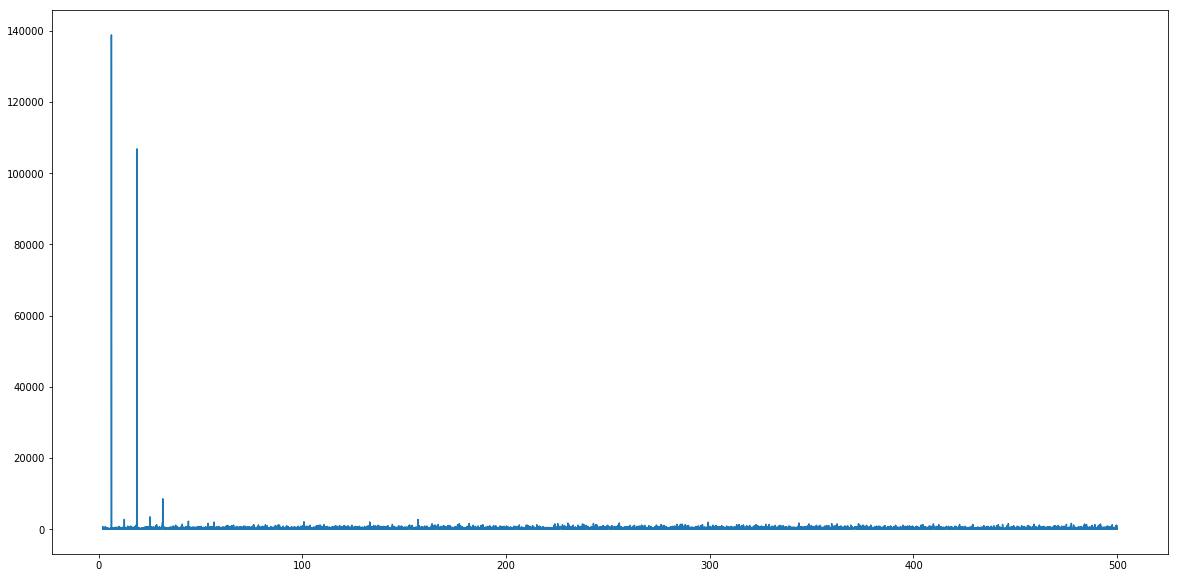

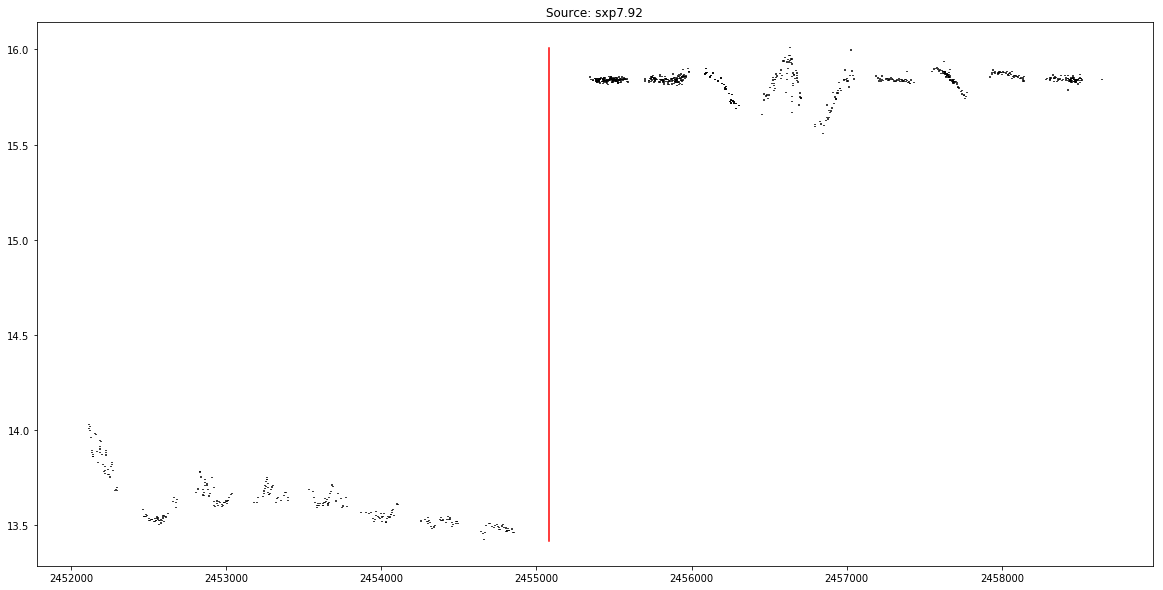

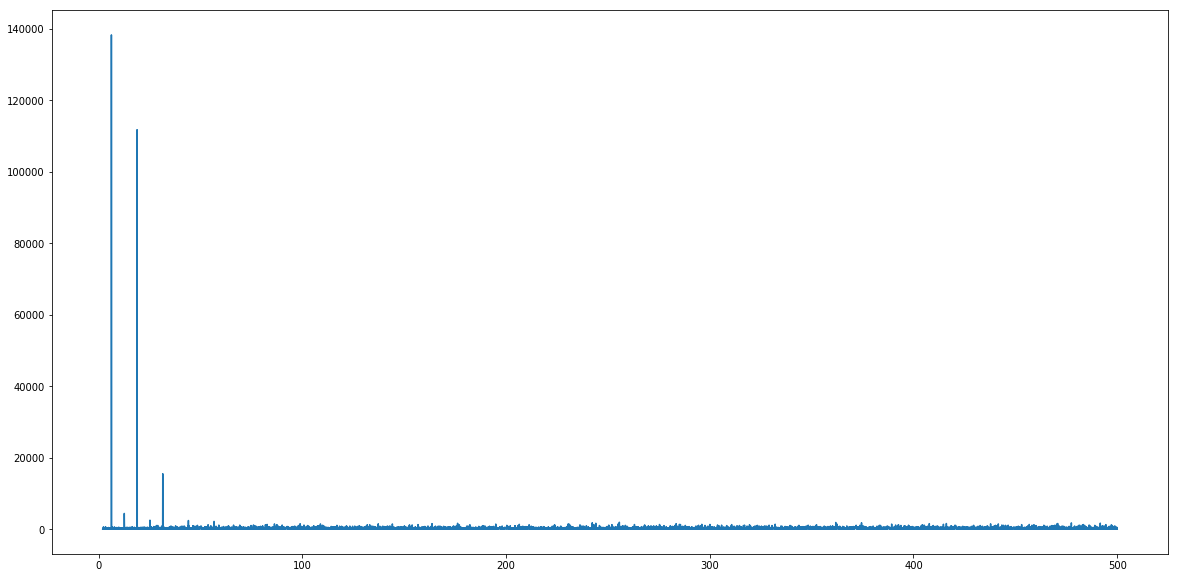

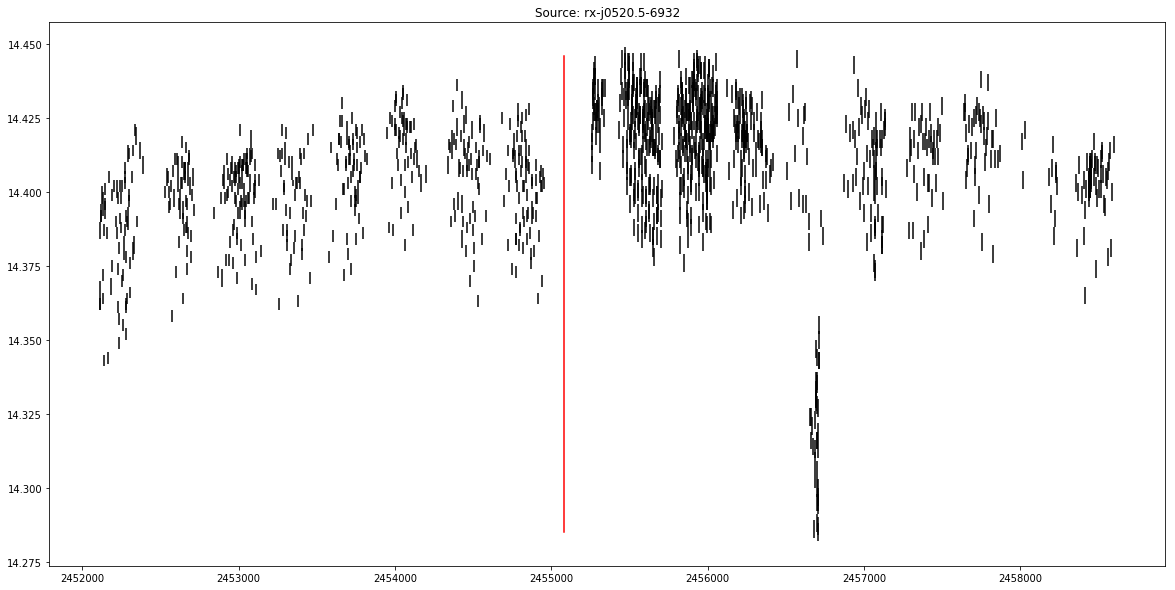

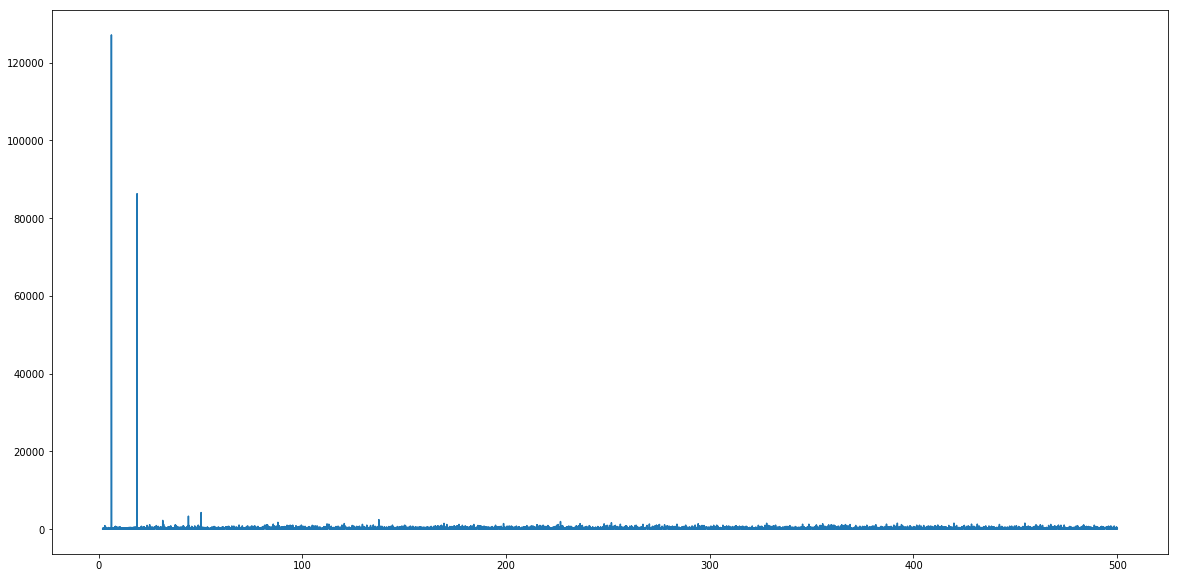

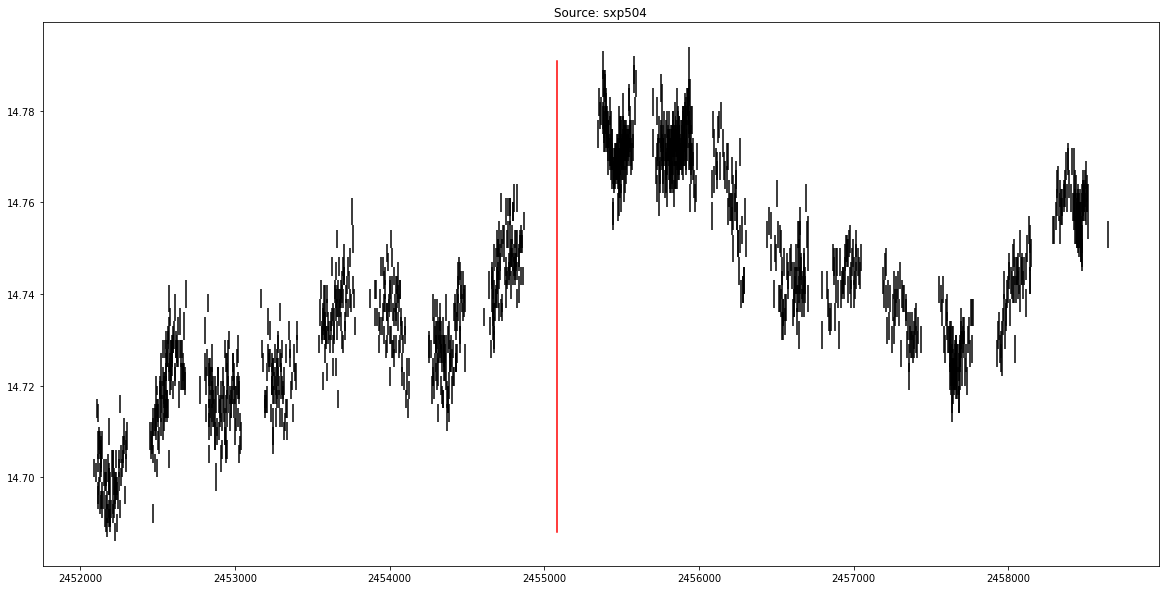

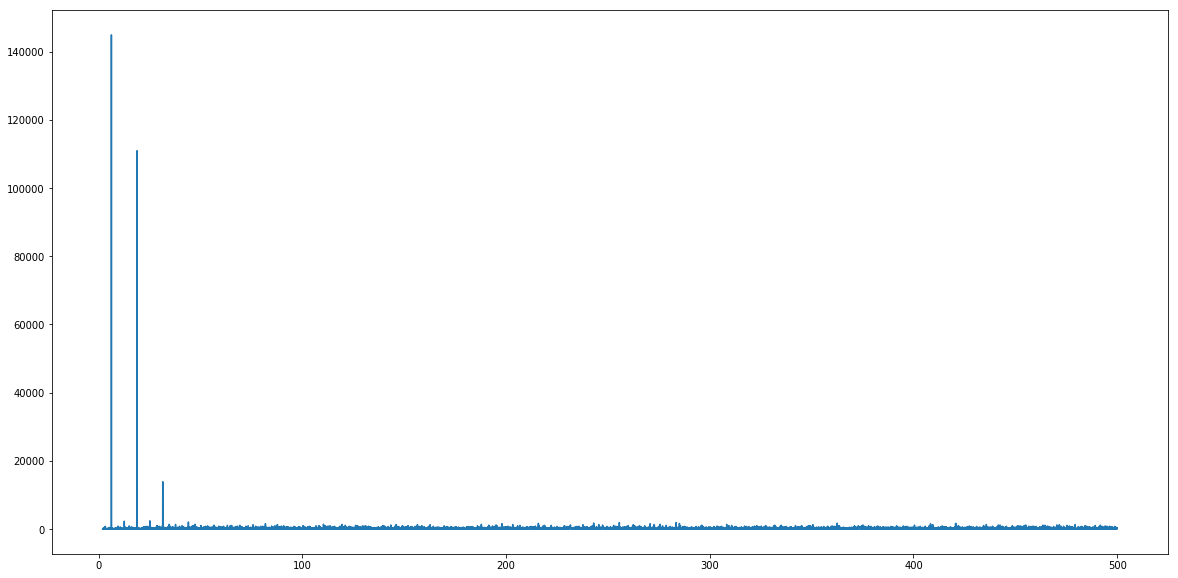

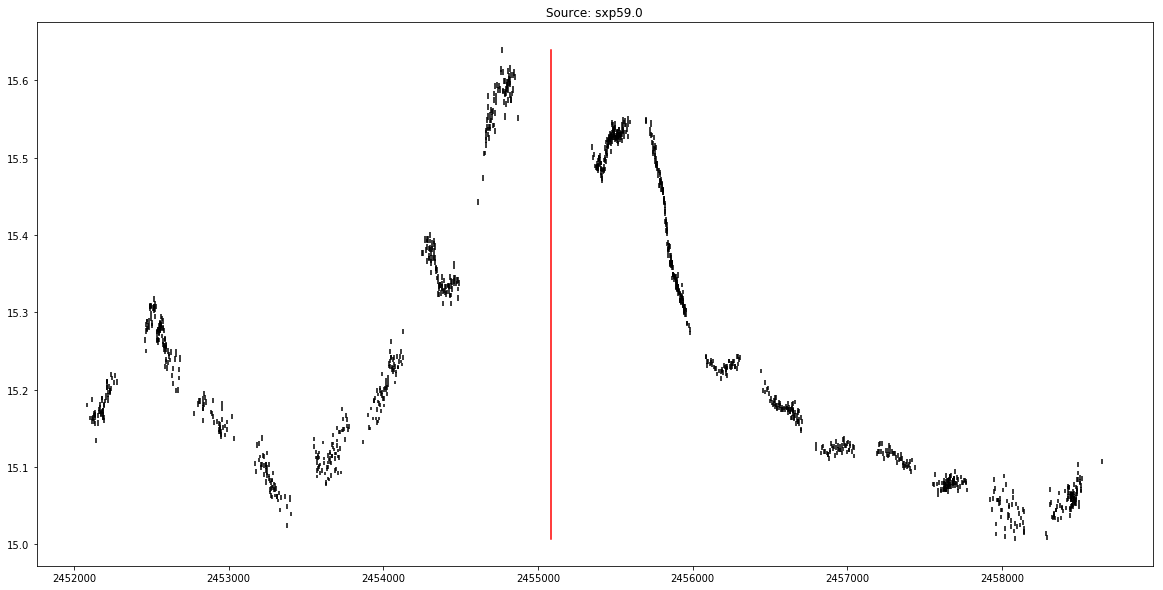

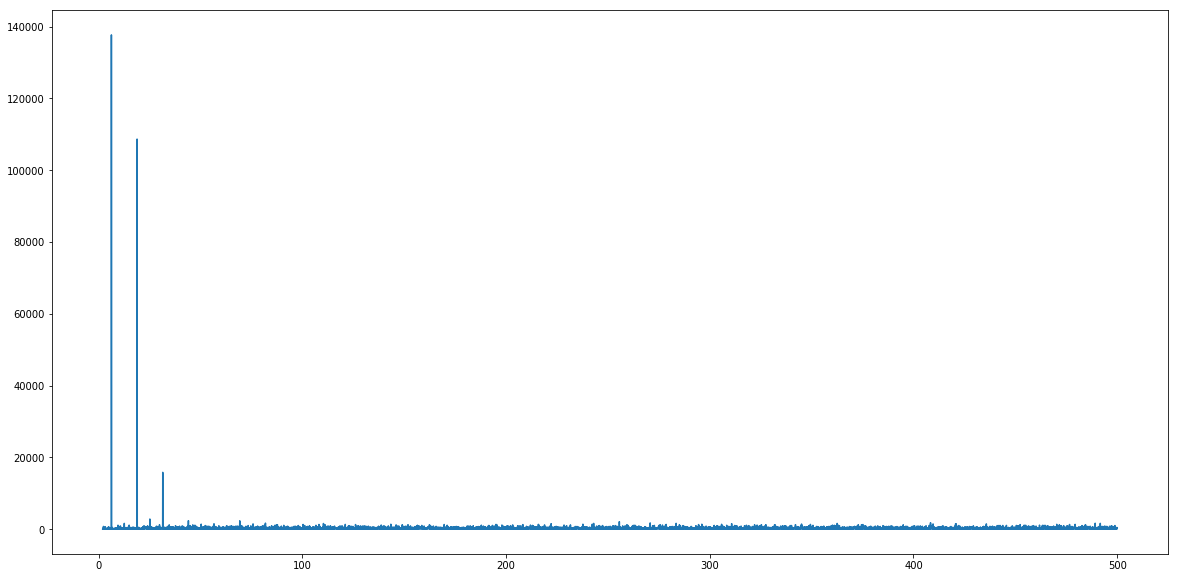

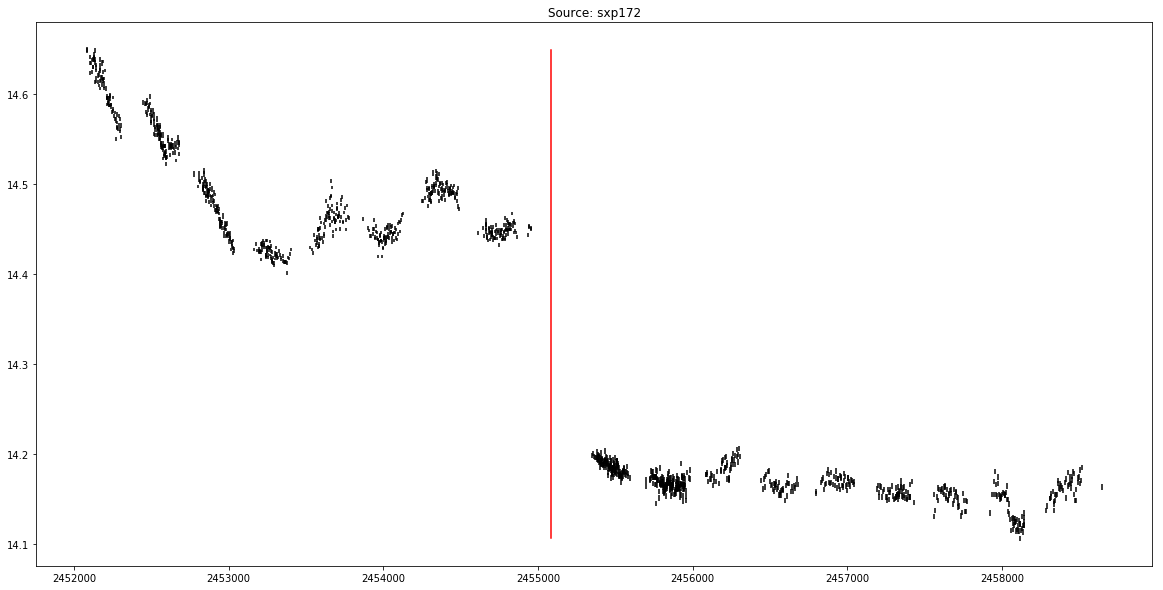

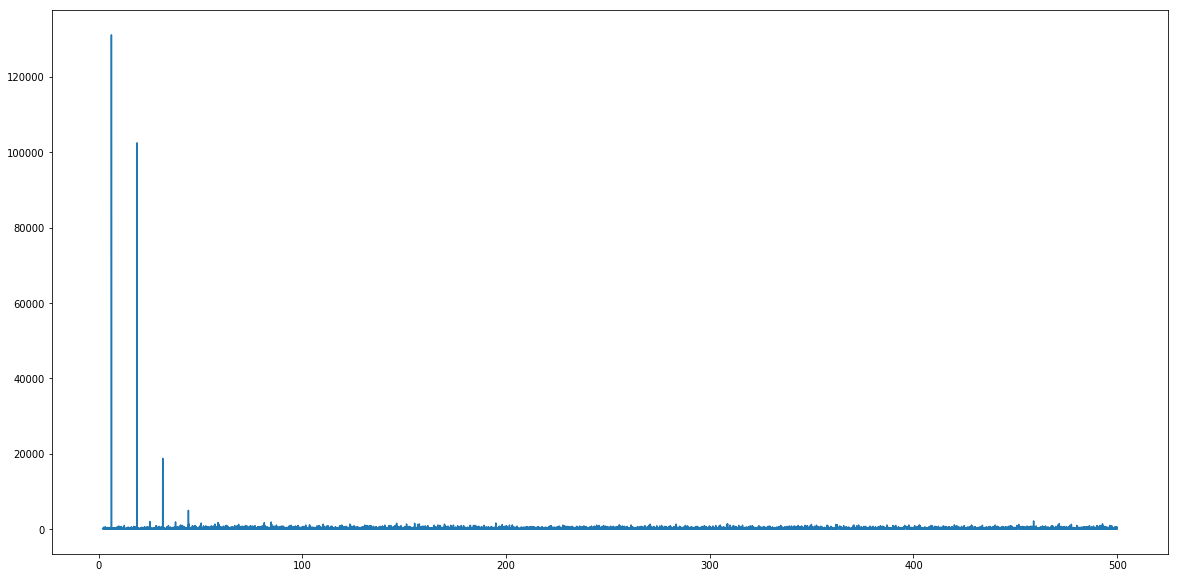

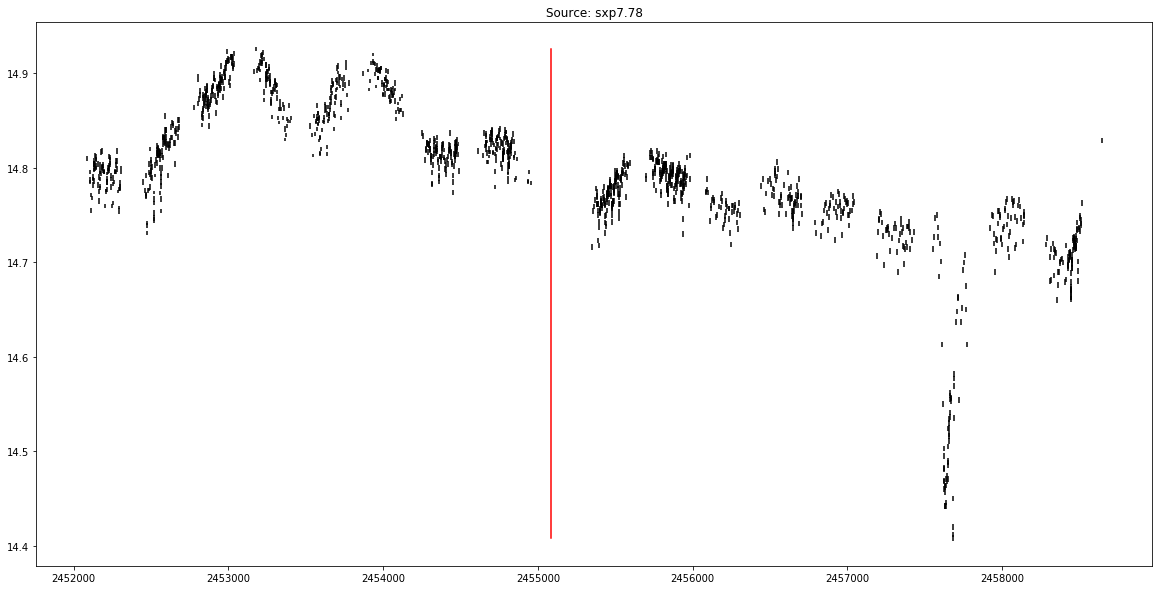

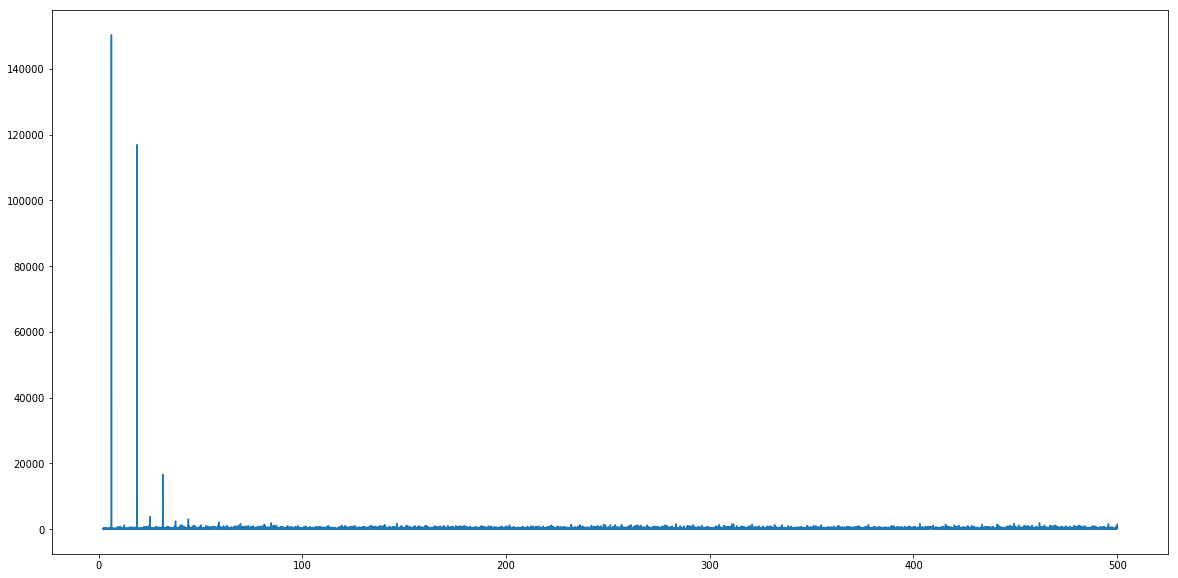

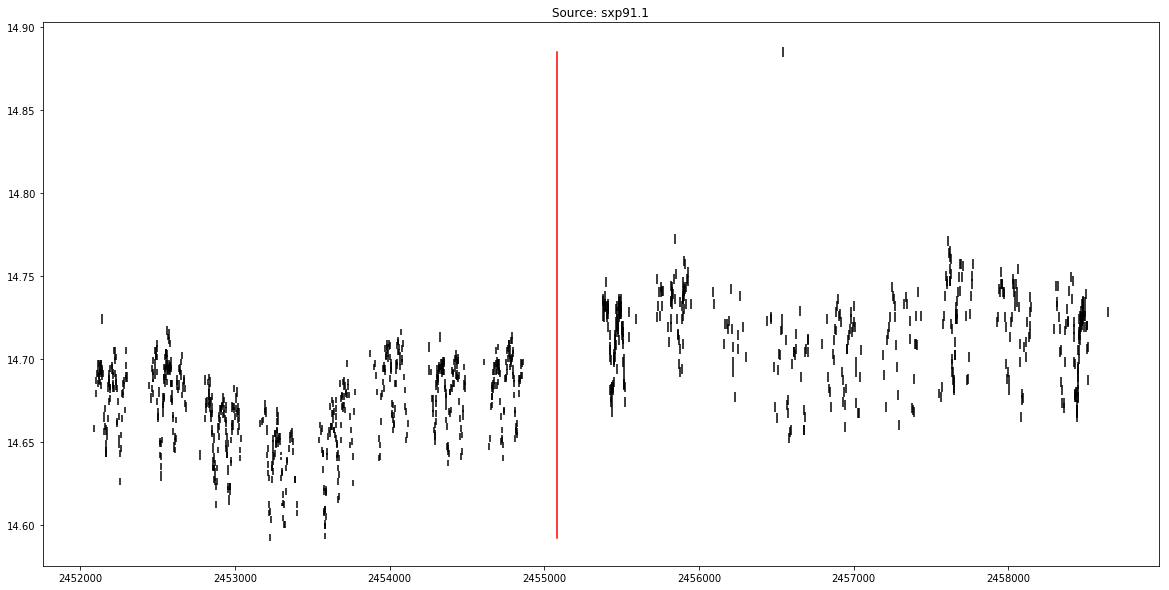

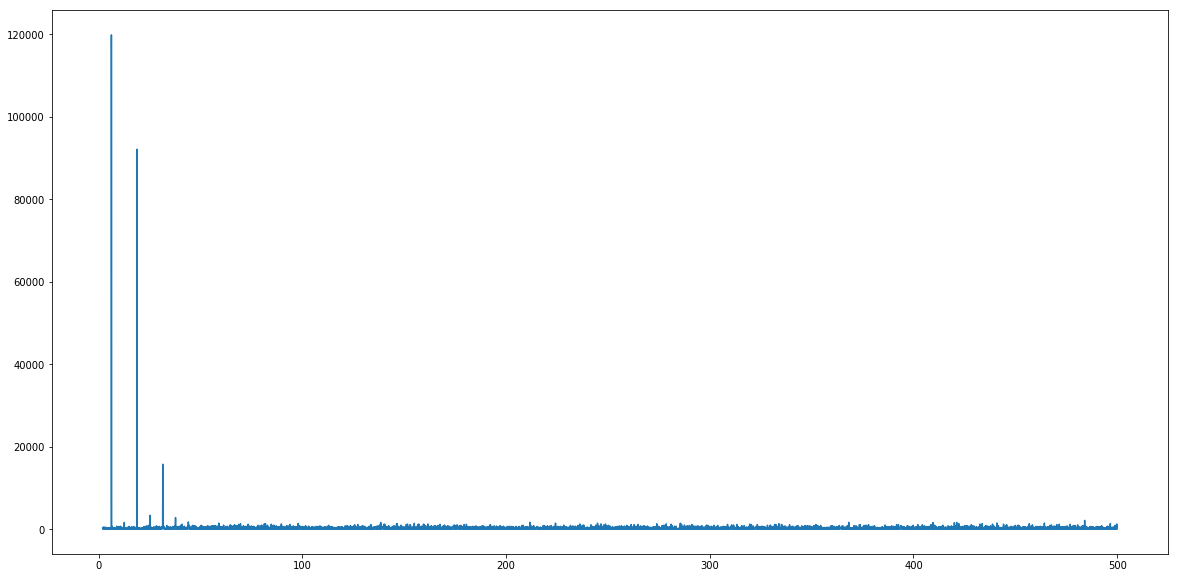

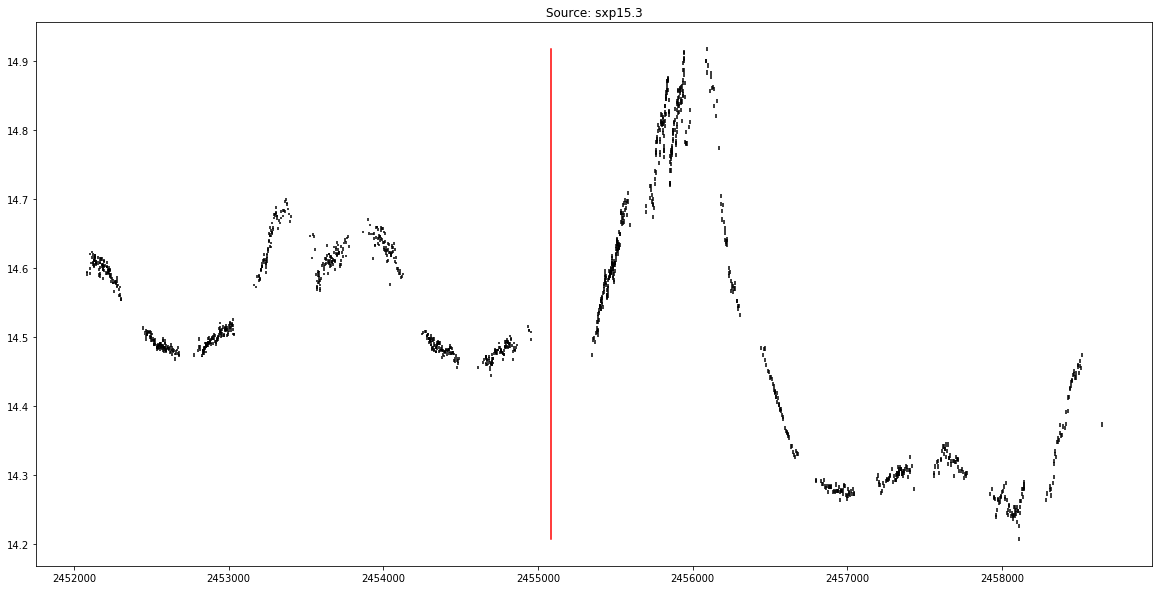

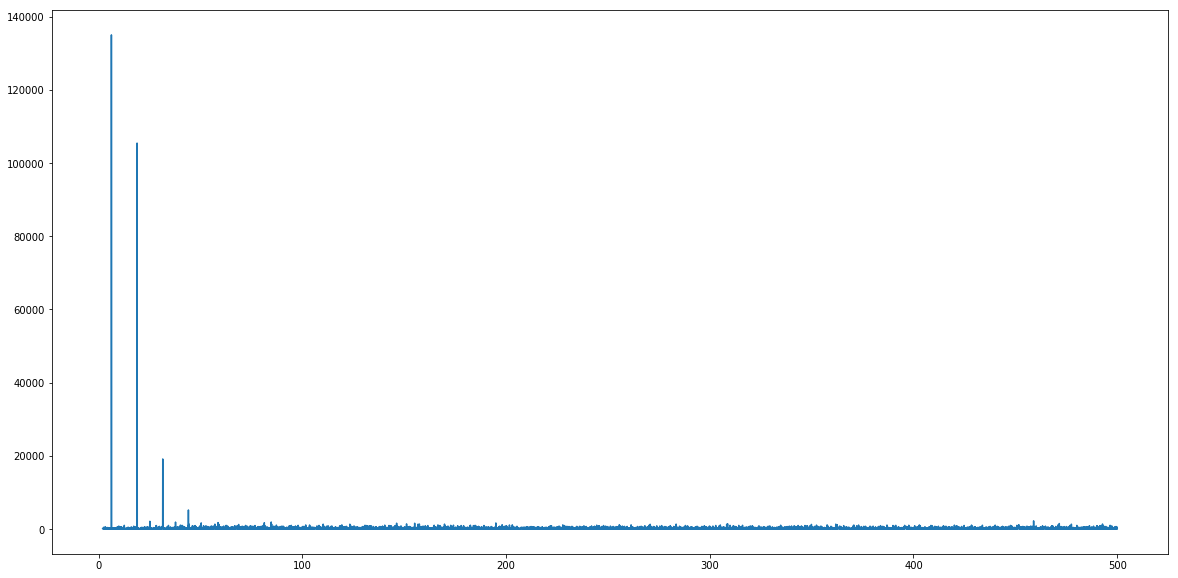

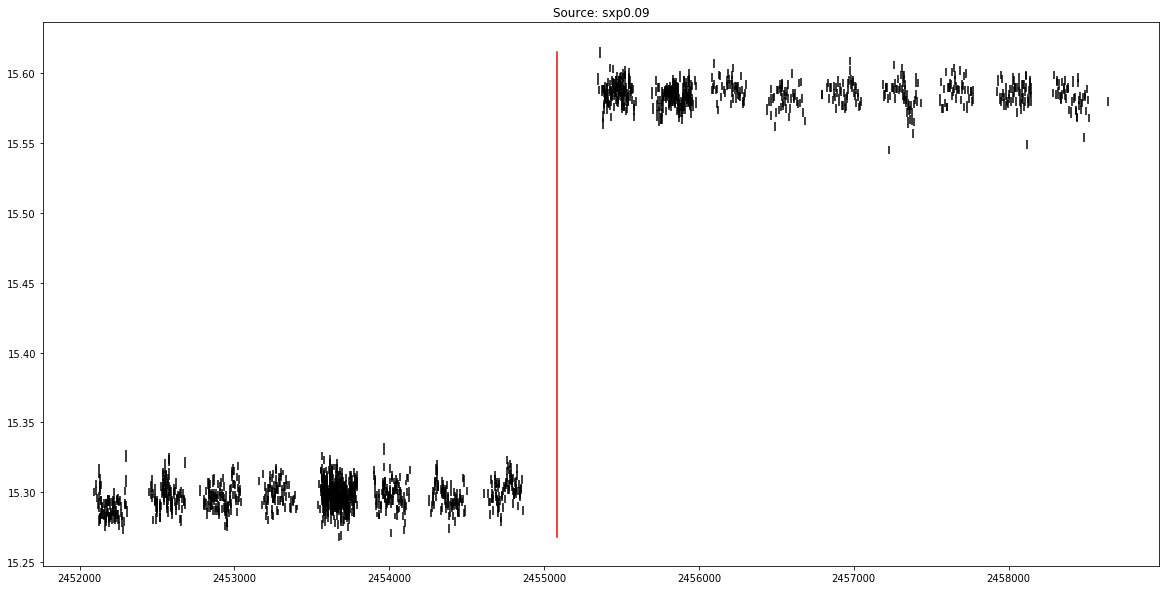

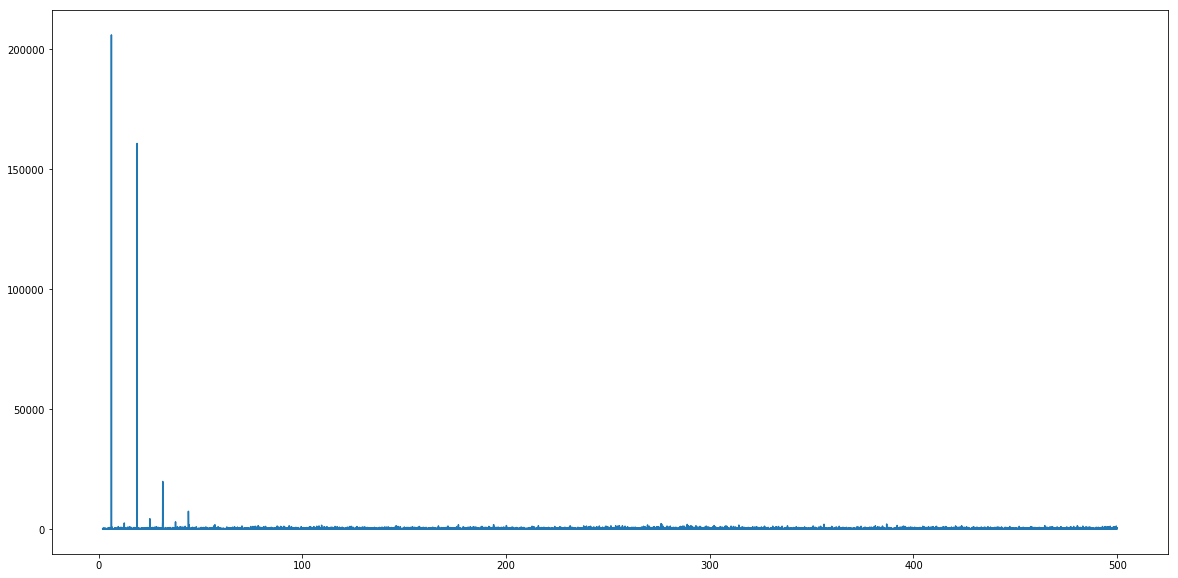

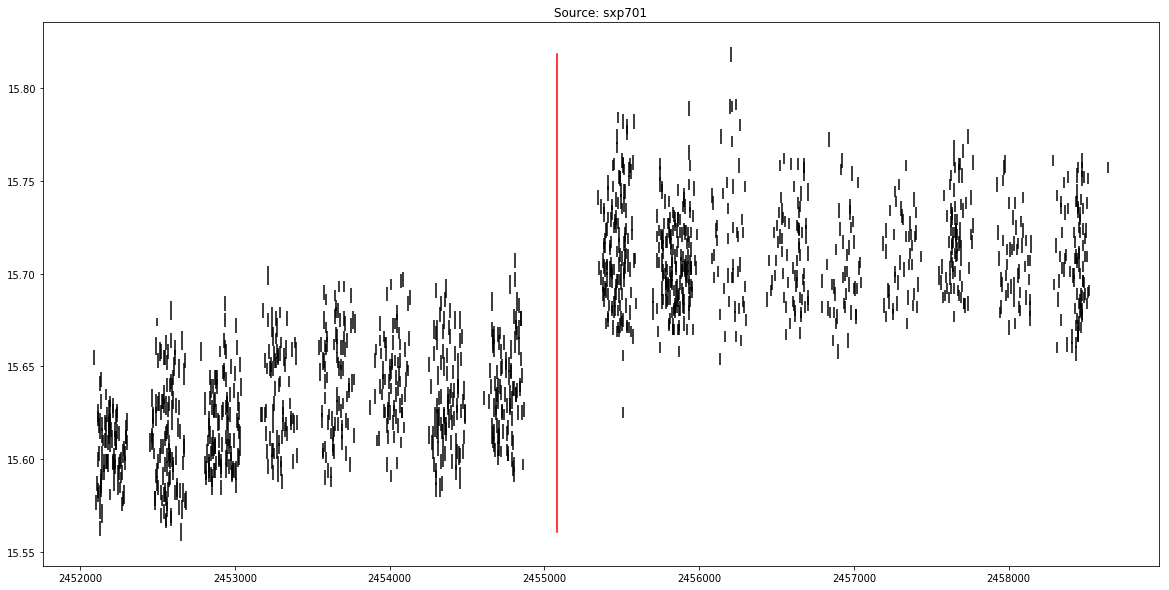

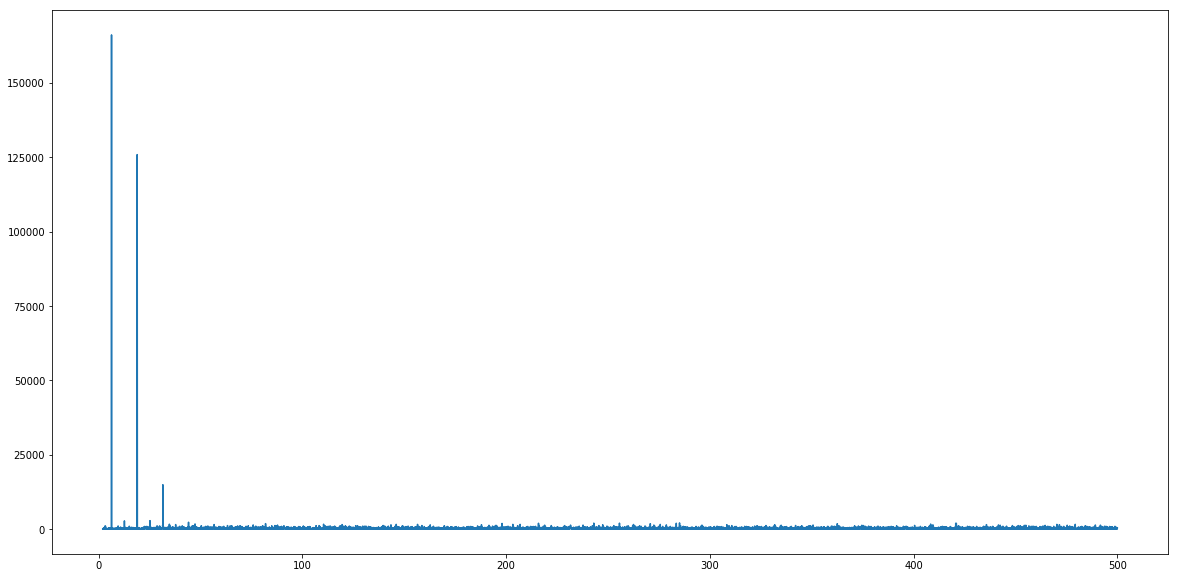

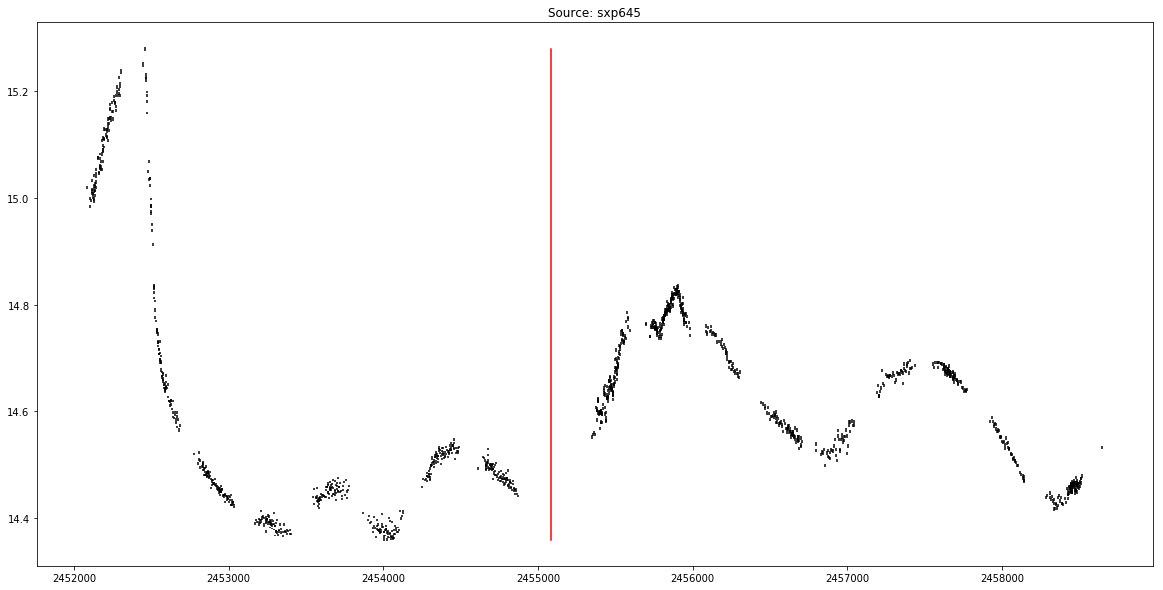

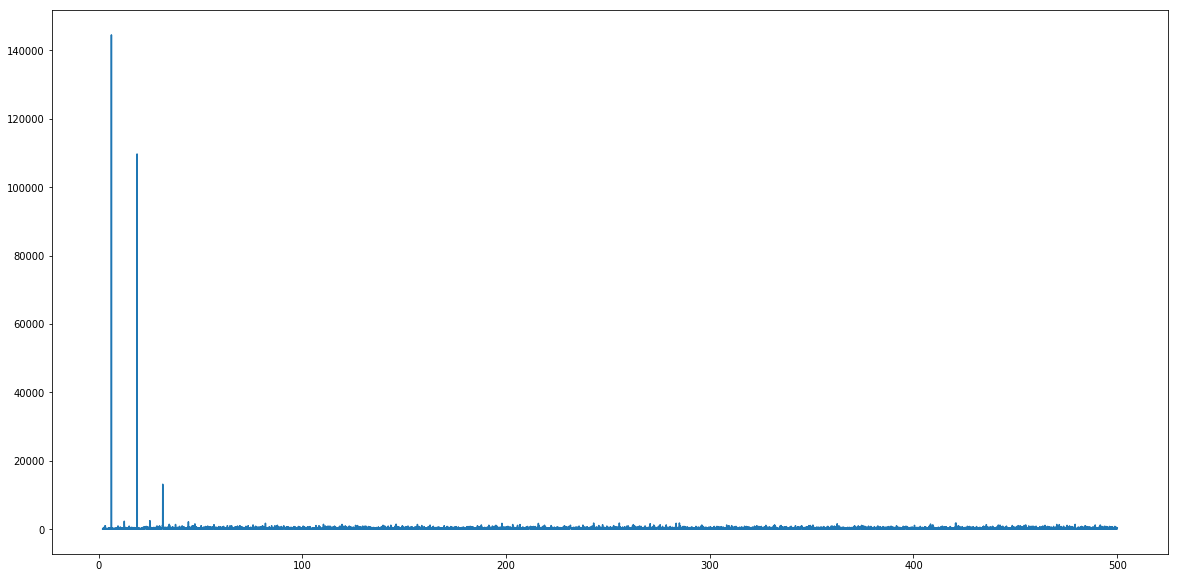

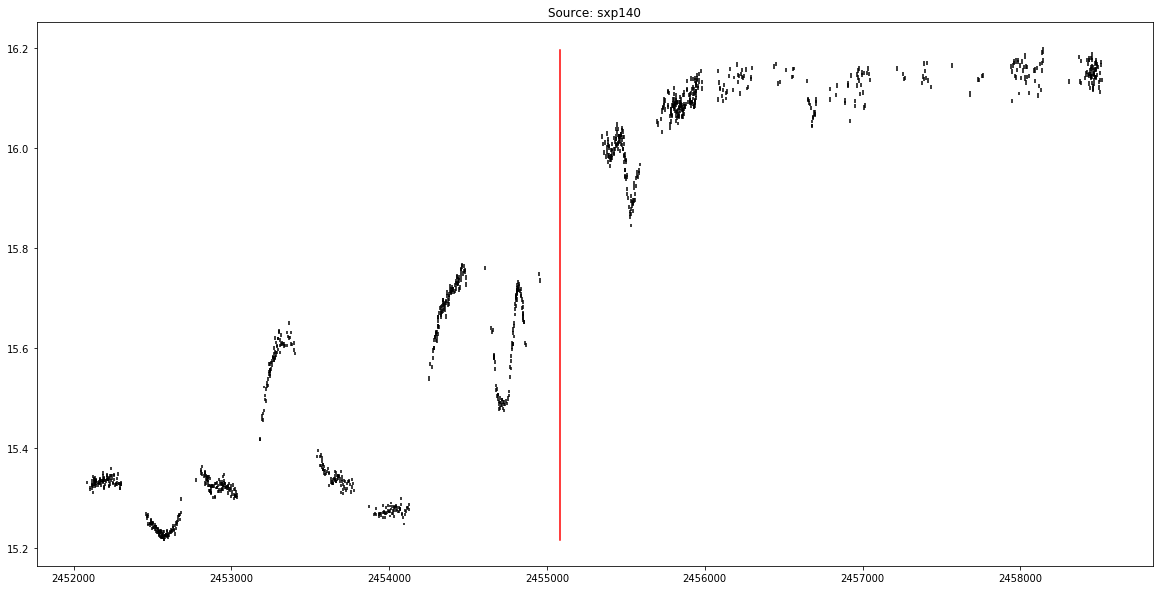

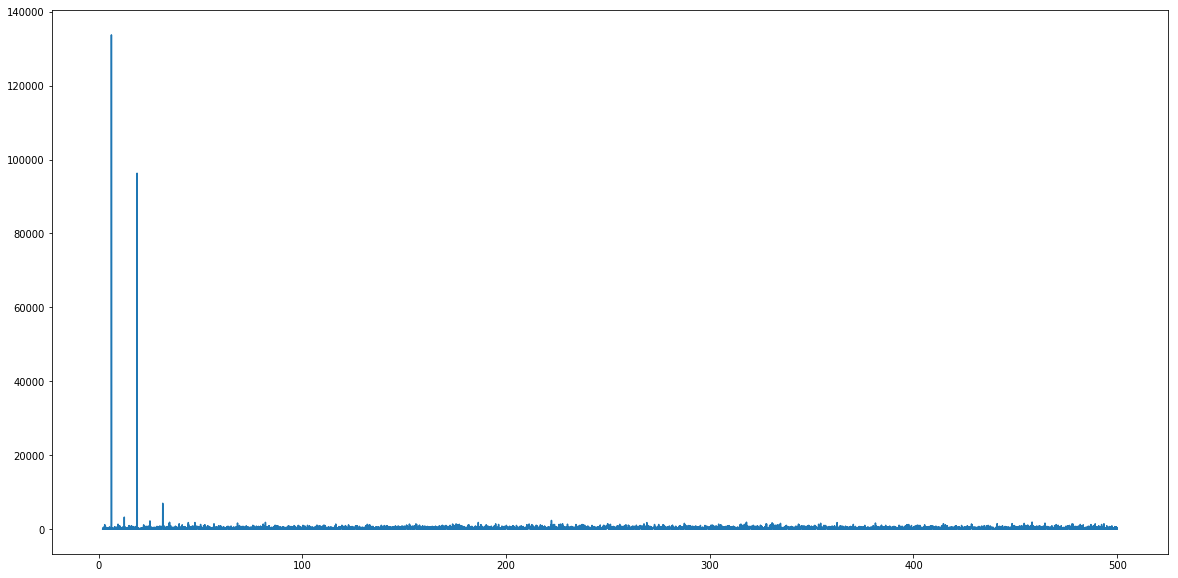

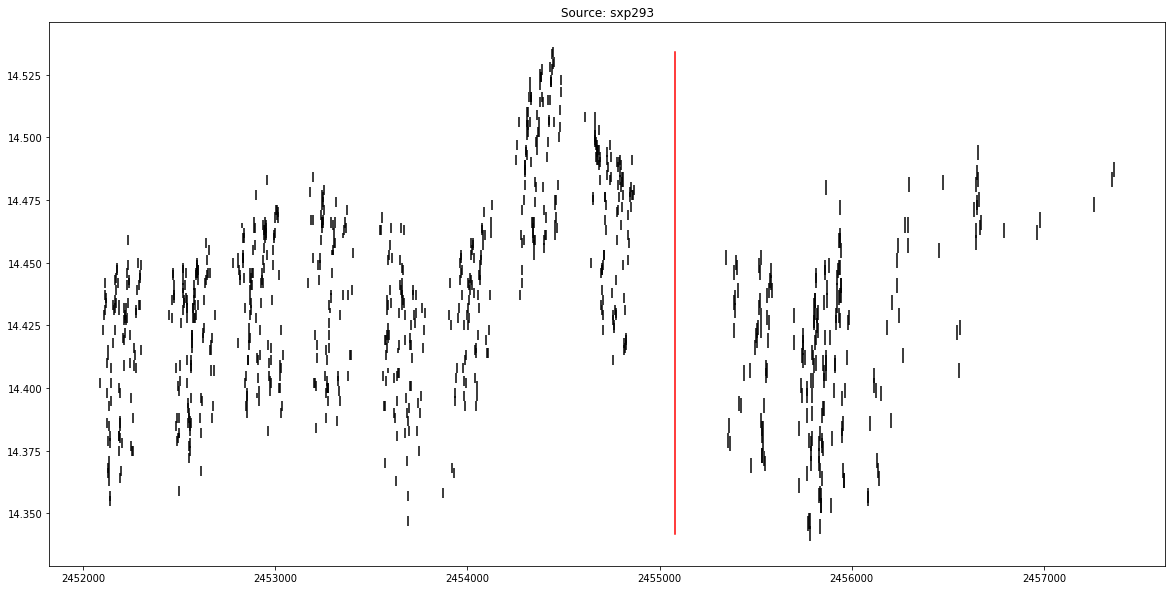

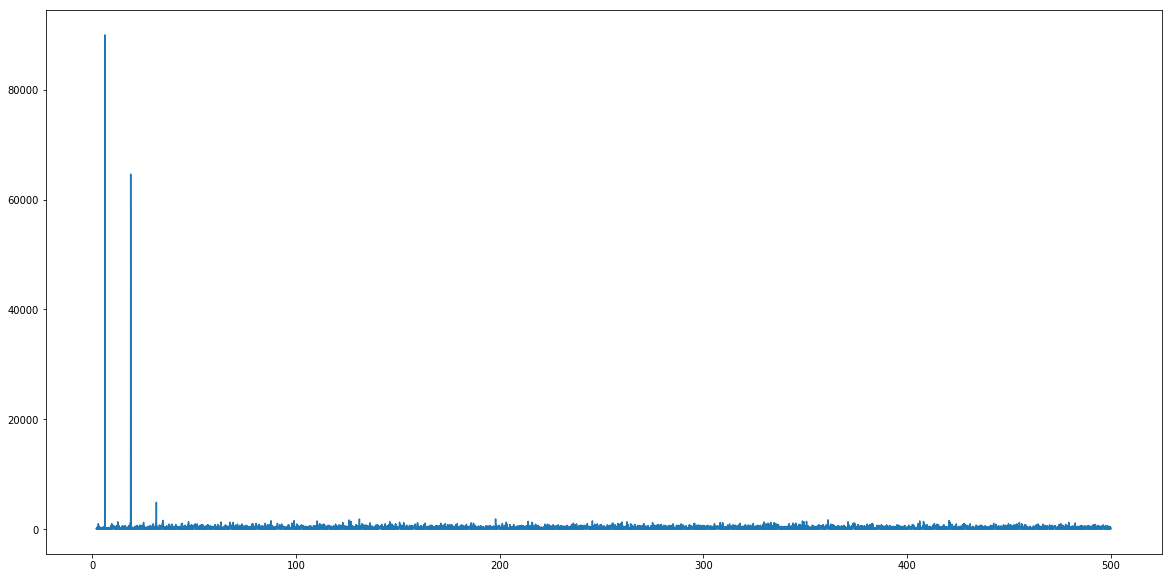

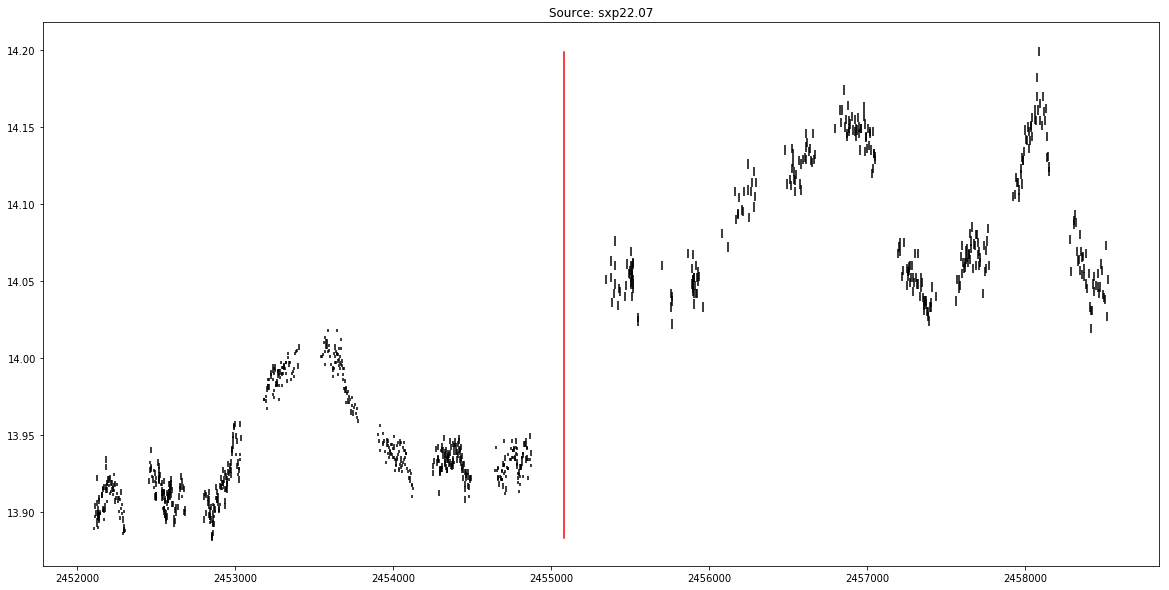

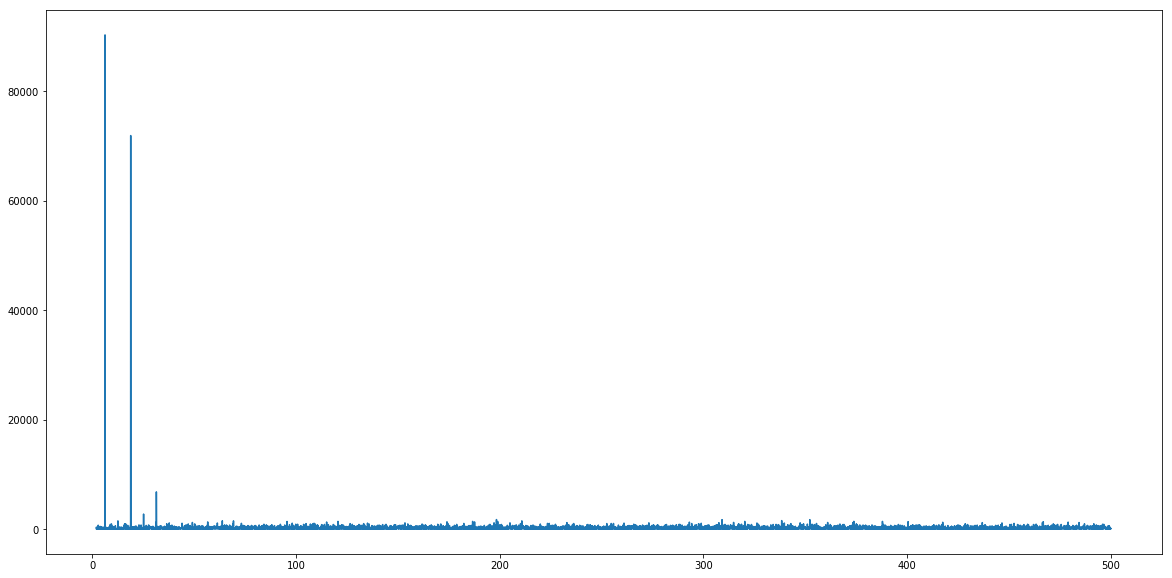

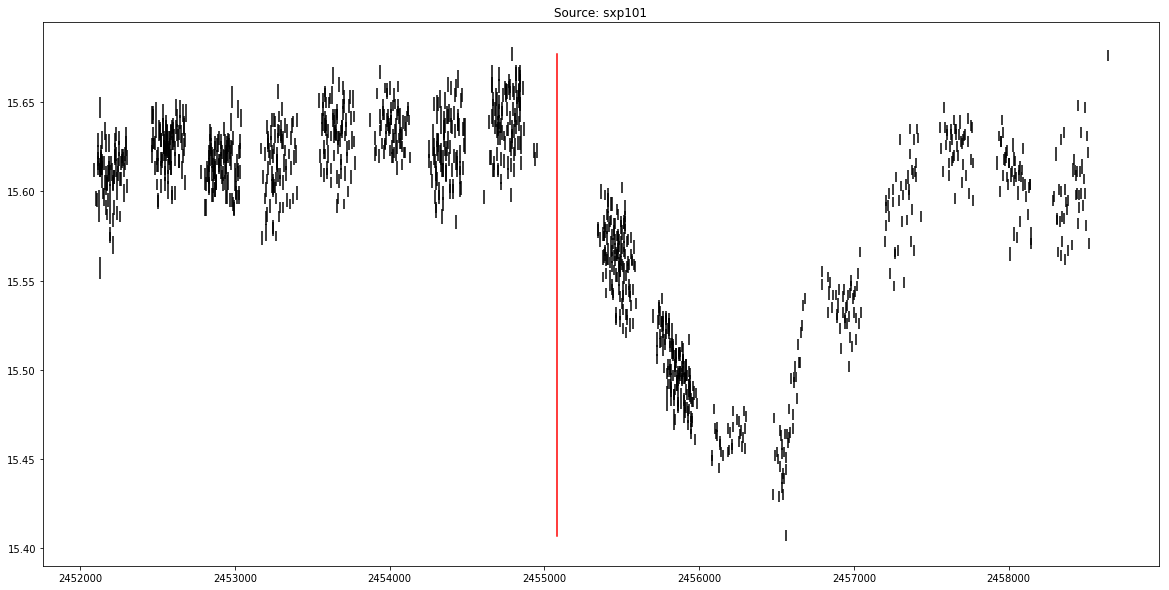

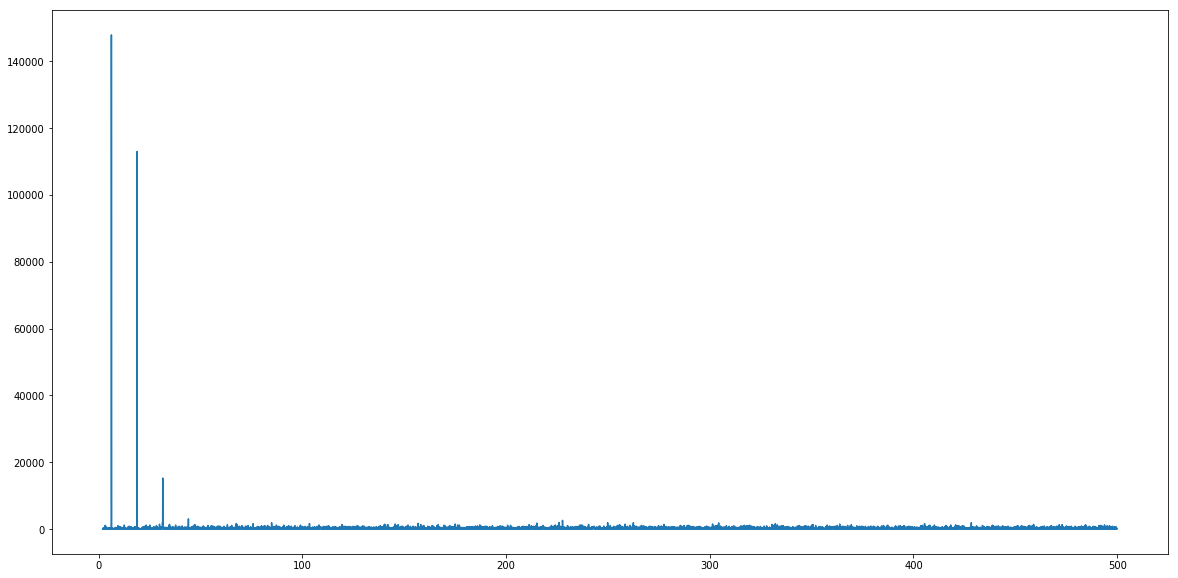

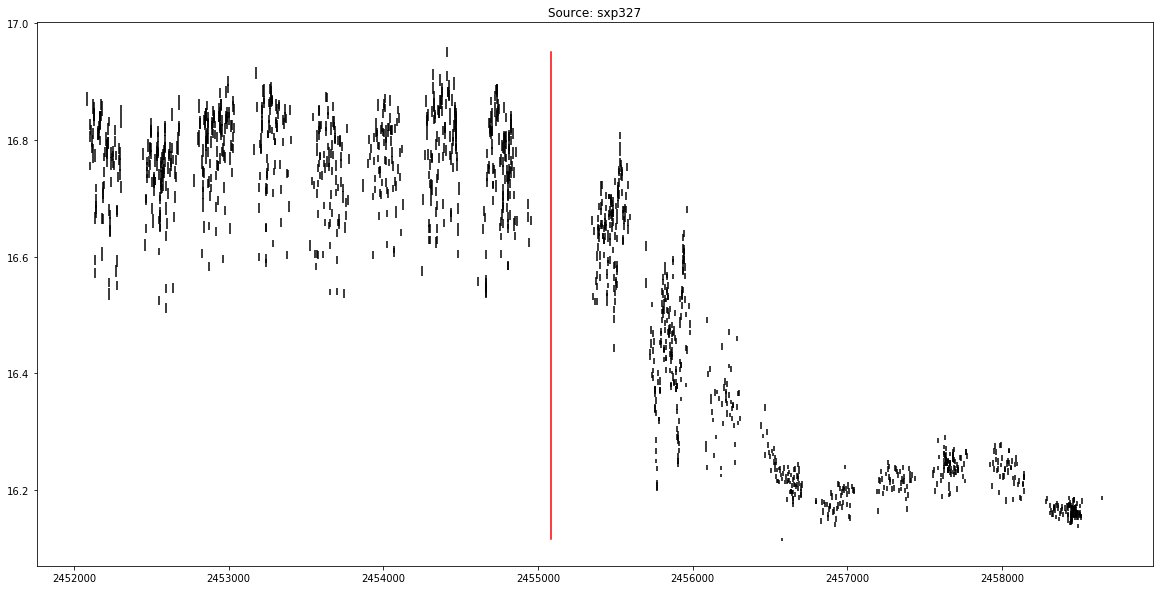

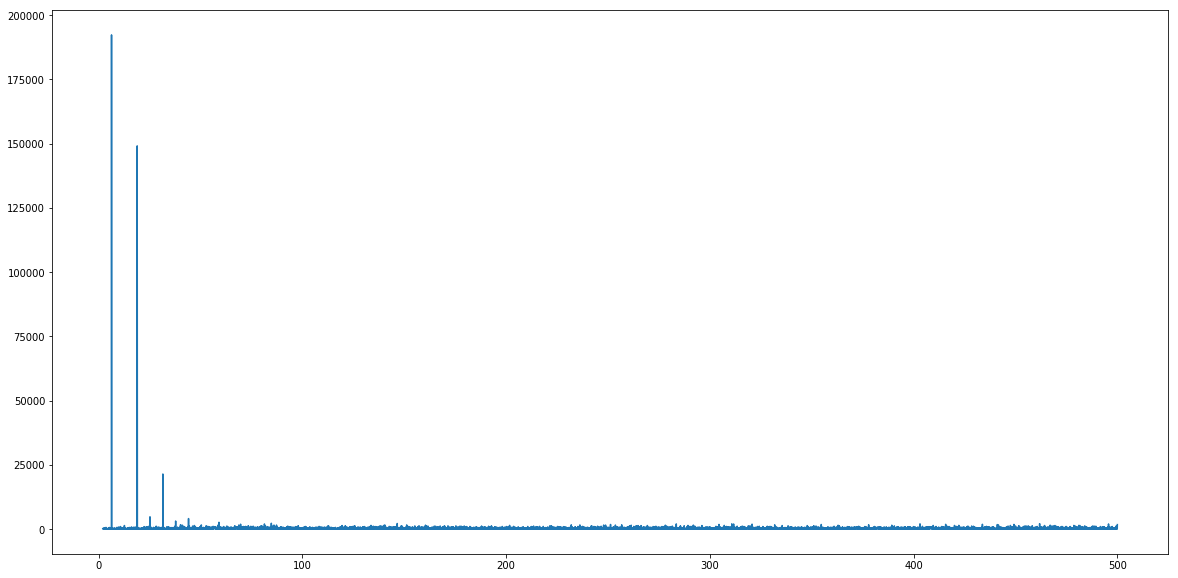

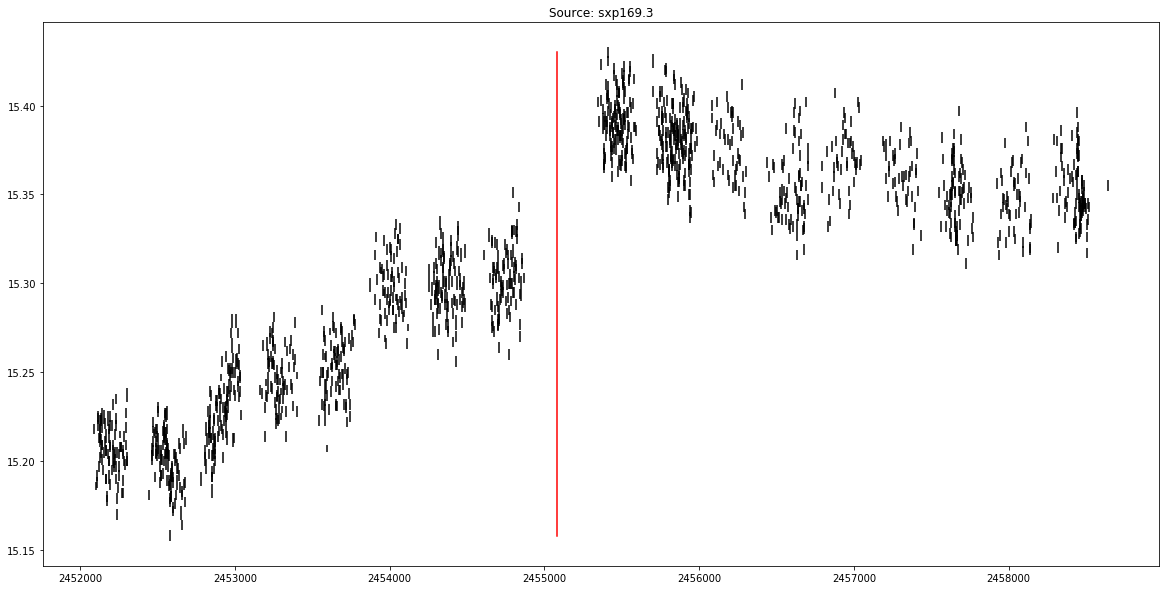

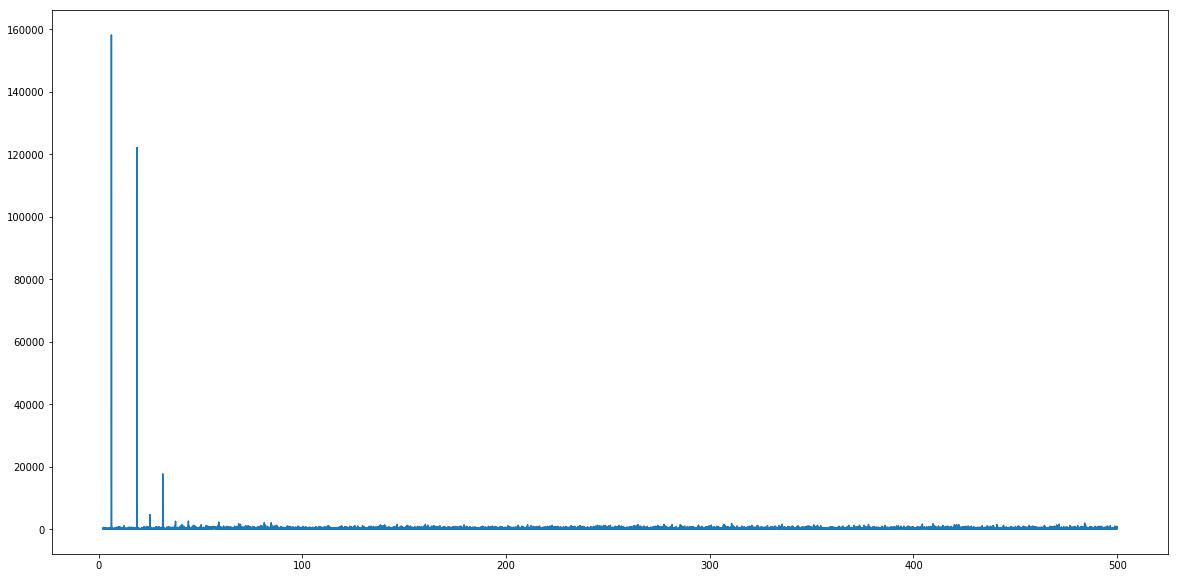

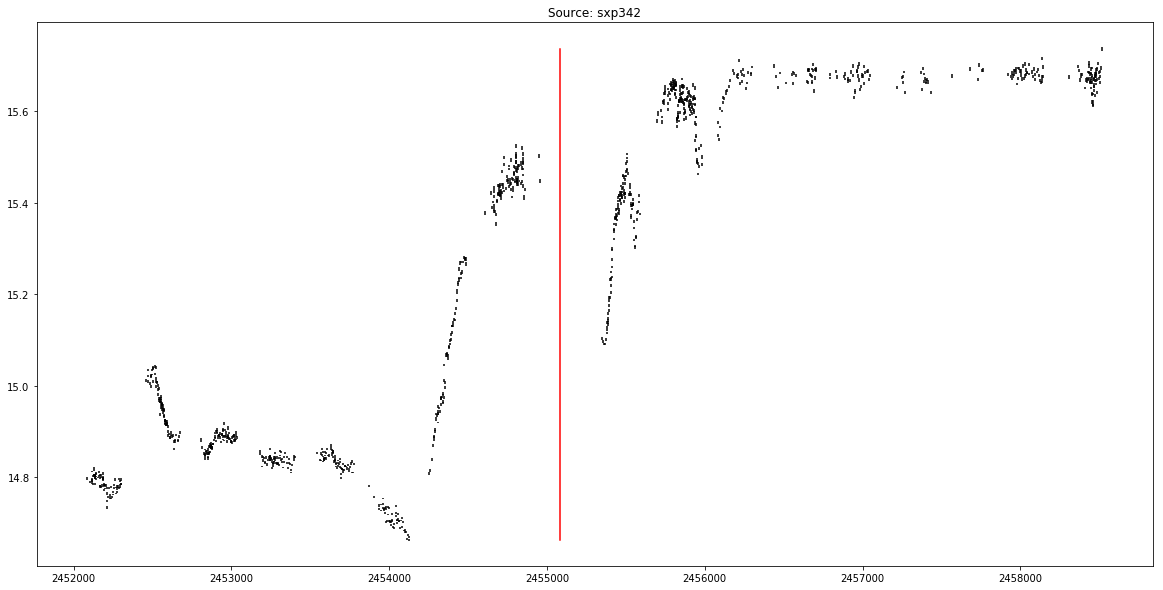

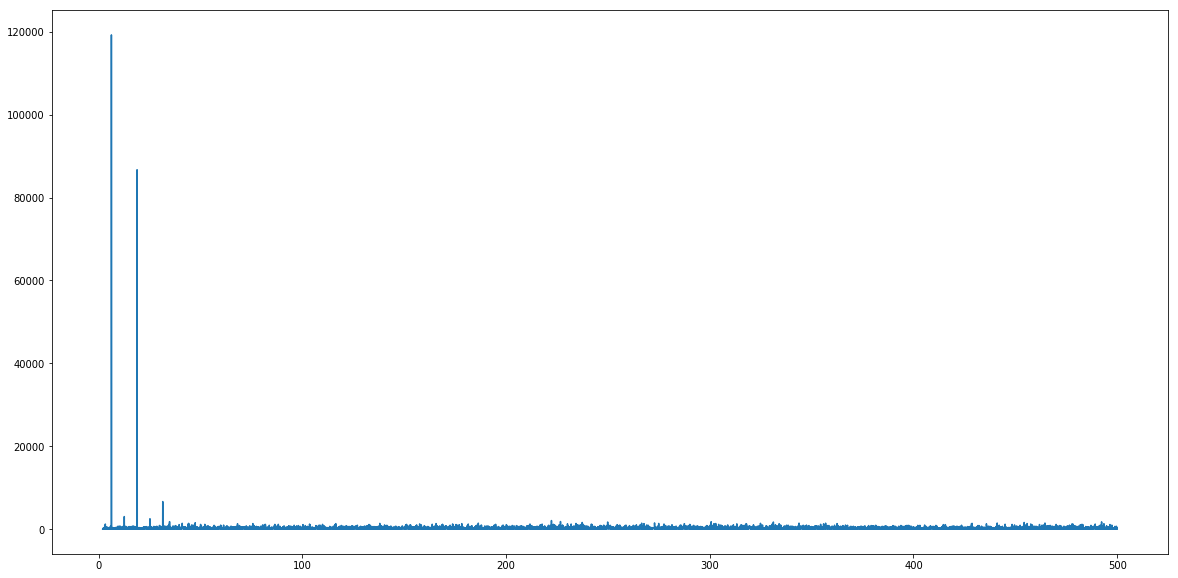

In [48]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
for filename in os.listdir(data_path+"/ogle_merge"):
    data = np.loadtxt(data_path+"/ogle_merge/"+filename, delimiter=",")
    plt.plot([2455081.5,2455081.5], [np.min(data[:,1]), np.max(data[:,1])], color="r")
    plt.errorbar(data[:,0], data[:,1], yerr=data[:,2], ecolor="black", fmt=" ")
#     plt.ylim([10,20])
    plt.title("Source: {}".format(filename[:-4]))
    plt.show()
    pgram = lombscargle(data[:,0], data[:,1], np.linspace(2, 500, 10000), normalize=False)
    plt.plot(np.linspace(2, 500, 10000), pgram)
    plt.show()

In [38]:
data = np.loadtxt(data_path+"/ogle_merge/sxp0.92.csv", delimiter=",")
ogle3_sxp092 = data[np.where(data[:,0]<2455081.5)[0]]
ogle4_sxp092 = data[np.where(data[:,0]>2455081.5)[0]]
# plt.hist(ogle3_sxp092[:,1])
# plt.hist(ogle4_sxp092[:,1], alpha=0.5)
plt.show()

16.202 16.202
